<a href="https://colab.research.google.com/github/AmeeraWan/R_Projects/blob/main/Microarray_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Google Colab in R:

https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497

# **Libraries used in Microarray Analysis**

---



In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GEOquery")
BiocManager::install("limma")
BiocManager::install("M3C")
BiocManager::install("maptools")
BiocManager::install("gplots")
BiocManager::install("heatmap.plus")
BiocManager::install("RColorBrewer")
BiocManager::install("Biobase")
BiocManager::install("affy")
BiocManager::install("GO.db")
BiocManager::install("org.Hs.eg.db")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'GEOquery'

also installing the dependencies ‘BiocGenerics’, ‘R.oo’, ‘R.methodsS3’, ‘Biobase’, ‘R.utils’, ‘limma’


Old packages: 'crayon', 'fansi', 'knitr', 'processx', 'readxl', 'sass',
  'tinytex', 'tzdb', 'cluster', 'MASS', 'Matrix', 'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'limma'”
Old packages: 'crayon', 'fansi', 'knitr', 'proc

In [ ]:
install.packages("pheatmap")
install.packages('gplots')
install.packages('tibble')
install.packages('dplyr')
install.packages("tidyverse")
install.packages('pillar')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
#library(pillar)
library(Biobase)
library("GEOquery")
library(limma)
library(umap)
library(affy)
library(RColorBrewer)
library(pheatmap)
library(gplots)
library(GO.db)
library(org.Hs.eg.db)
library('tibble')
library('dplyr')
library(tidyr)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply,

# **Microarray Workflow**

---



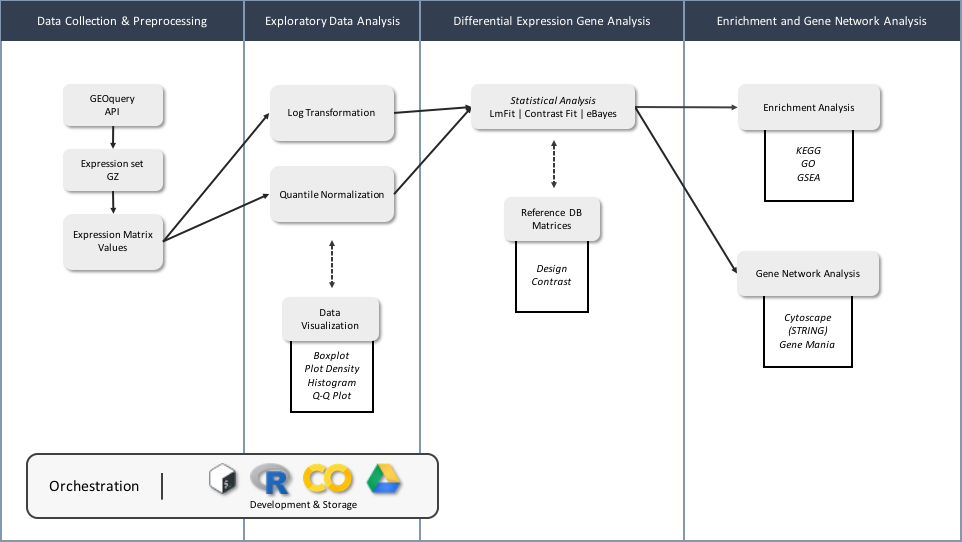

# **Data set**

---



**Aims**:

Here I am investigating the effects of the overexpression of CDH1 and CDH1a in Gastric cancer to see the gene expression levels in each of these conditions and also the pathway that they are involved in.

**Dataset**:

The dataset used here is obtained from the GEO database in which can be accessed here: 
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE32540 

The data set consists of 3 groups placed in 3 conditions:
- 3 samples of gastric cancer with over expression of CDH1 
- 3 samples of gastric cancer with over expression of CDH1a
- 3 samples of gastric cancer which as a control

**Background**:

CDH1
- CDH1 encodes for E-cadherin
- CDH1 is a tumour suppressor gene
- Therefore if CDH1 is inactivated or mutated it leads to the loss of protein function, which can cause gastric cancer
- Studies has found that the decrease in the expression of E-cadherin leads to cancer progression
- There are studies that have shown that CDH1 expression is very low in cancers

CDH1a
- Another thing to note is that CDH1 intron 2 is a cis modulator/regulator of E-caherin expression 

CDH1 intron 2 encodes for non-canonical transcripts:
- One of these transcripts are CDH1a
- It has been reported that CDH1a has been found in gastric cancer cell line and absent in normal stomach
- In cancer with high expression of CDH1a it was found that the expression levels of CDH1 is low
- Therefore CDH1a is very likely to cause disruption of E-cadherin signalling

Assumptions:
- CDH1 helps to suppress tumour
- CDH1a promotes tumour progression

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE32540

https://www.oncotarget.com/article/13401/text/  

Based on the background above we could infer the following:

- Gastric Cancer cell line (Mkn28) that has been induced to express high levels of CDH1 are likely to suppress or reduce cancer progression
- Gastric Cancer cell line (Mkn28) that has been induced to express high levels of CDH1a are likely to increase cancer progression

However, further investigation needs to be done to confirm this.  




# Obtaining & extracting raw data directly from GEO 

In [ ]:
# This gets data directly from GEO database and it automatically annotates the gene Probes
# therefore there is no need of doing it manually 
# Also, it also solves the problem if the files are in cel or txt and both can be used with this code
# Another thing is that it helps to convert the raw data into expression set class automatically
eset <- getGEO("GSE32540", GSEMatrix =TRUE, AnnotGPL=TRUE)

Found 1 file(s)

GSE32540_series_matrix.txt.gz



In [ ]:
# this is to view the data and as we can see that it is still in text.gz
eset

$GSE32540_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 54675 features, 9 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM806613 GSM806614 ... GSM806621 (9 total)
  varLabels: title geo_accession ... tissue origin:ch1 (37 total)
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (54675 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 22752307 
Annotation: GPL570 


In [ ]:
# this code helps to extract the raw data from the txt.gz file
# if this step is not done, you are not able to manipulate the data
# the GPL570 represents the annotation name of this dataset,
# so if you wish to use this code for a different dataset,
# all you need to do is enter the annotation name found in the eset description 
if (length(eset) > 1) idx <- grep("GPL570", attr(eset, "names")) else idx <- 1
eset <- eset[[idx]]

In [ ]:
# this is to view the data and you will notice that it is no longer in txt.gz
eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 54675 features, 9 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM806613 GSM806614 ... GSM806621 (9 total)
  varLabels: title geo_accession ... tissue origin:ch1 (37 total)
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (54675 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 22752307 
Annotation: GPL570 

In [ ]:
# check the dimension of your data
# feature represents the number of rows
# sample represents the number of columns
dim(eset)

Features  Samples 
   54675        9

In [ ]:
# This is to rename the sample names
sampleNames(eset) <- c("CDH1a.1", "CDH1a.2", "CDH1a.3", "Control.1", "Control.2", "Control.3", "CDH1.1", "CDH1.2", "CDH1.3")

In [ ]:
# this is to view if the sample names has been changed
eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 54675 features, 9 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: CDH1a.1 CDH1a.2 ... CDH1.3 (9 total)
  varLabels: title geo_accession ... tissue origin:ch1 (37 total)
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (54675 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 22752307 
Annotation: GPL570 

# Obtaining Expression Matrix values from your ExpressionSet

In [ ]:
# to obtain matrix values from Expression set 
Exprs <- exprs(eset)

In [ ]:
# the number of rows and column remains the same
dim(Exprs)

[1] 54675     9

In [ ]:
# to view part of the matrix values 
head(Exprs)

,CDH1a.1,CDH1a.2,CDH1a.3,Control.1,Control.2,Control.3,CDH1.1,CDH1.2,CDH1.3
1007_s_at,11.421052,11.234863,11.151138,11.363451,11.323295,11.272729,11.310315,11.338635,11.307311
1053_at,8.183362,8.112843,8.212021,7.959555,8.233236,8.363118,8.133404,8.046131,8.137223
117_at,6.795321,6.483956,6.500204,6.436064,6.714472,6.342724,6.368159,6.422308,6.398258
121_at,8.361258,8.488206,8.365462,8.643535,8.471281,8.431611,8.496252,8.530161,8.484286
1255_g_at,3.577869,3.527947,3.516331,3.509422,3.582891,3.568421,3.419339,3.501480,3.438278
1294_at,6.777275,6.567687,6.580118,6.611331,6.435155,6.385207,6.567687,6.513691,6.548085


# **Preprocessing Data**


---






# 1. Inspecting Data





This is to view the distribution of your data and to see if there are any outliers that needs to be removed and if the data is uniformed 

**Box Plot**




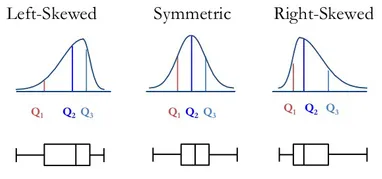

las – A numeric value indicating the orientation of the tick mark labels and any other text added to a plot after its initialization. The options are as follows: 

- always parallel to the axis (the default, 0) 

- always horizontal (1)

- always perpendicular to the axis (2)

- and always vertical (3).

http://rfunction.com/archives/1302

In [ ]:
# Create your colour arrangement
colour <- c(rep("yellow",3), rep("blue",3), rep("red",3))

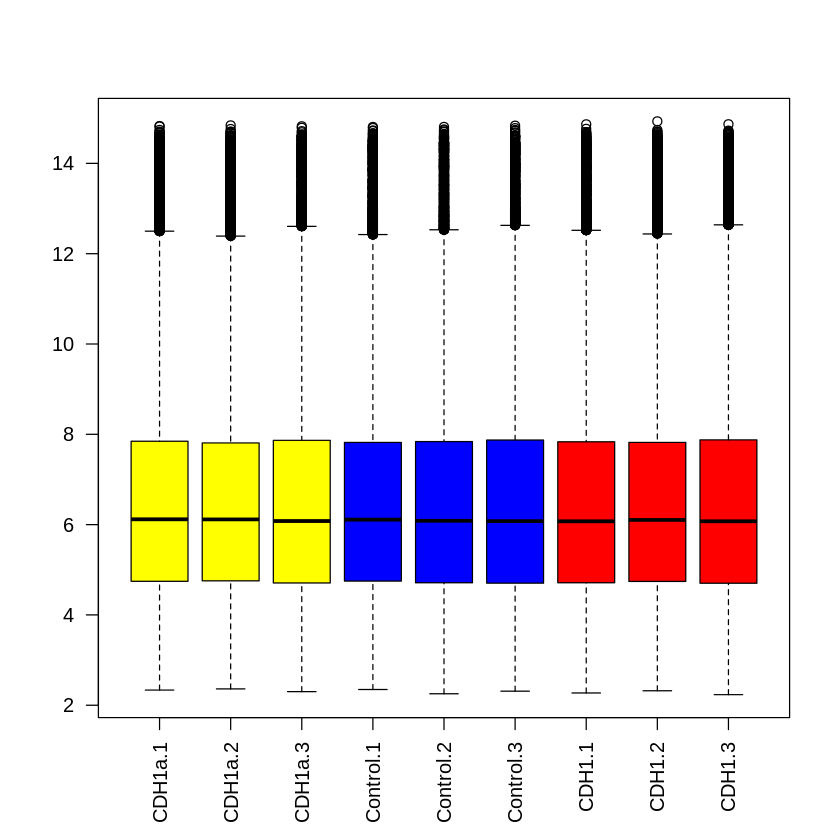

In [ ]:
# Create your box plot
boxplot(Exprs, col = colour, las =2)

From the look of the box plot, the data seems normalised and there seems to be a lot of outliers on the top of the box plot. Indicating there might be a right skew in this data

**Plot Density**

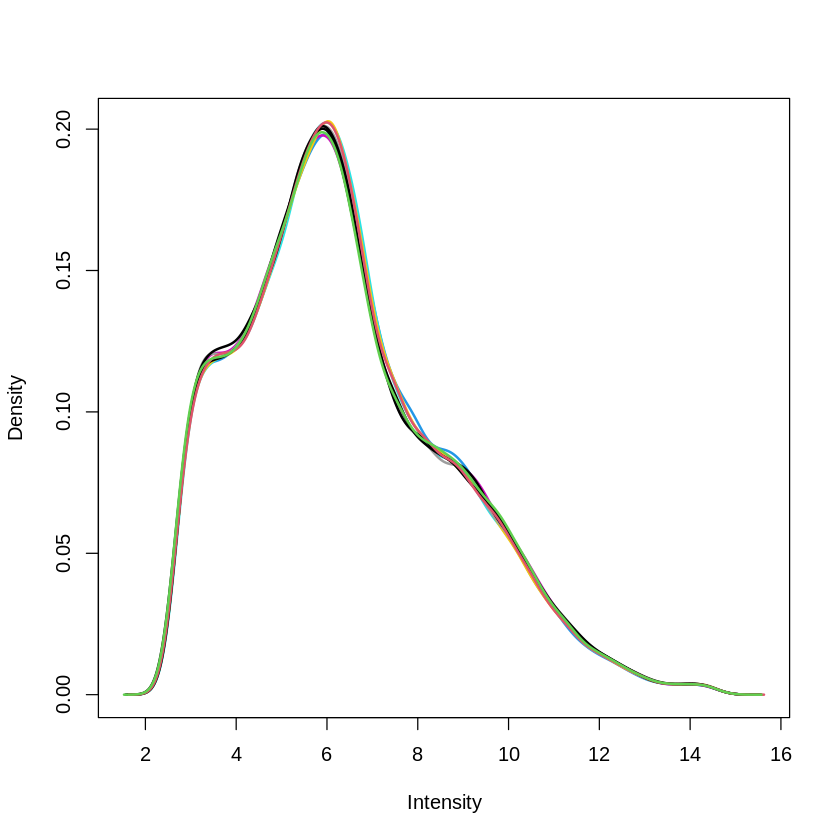

In [ ]:
# Creating Plot Density 
plotDensities(Exprs, legend = FALSE)

Now, looking at the plot density. The raw data does not seemed to be normally distributed and seemed to be skewing a little bit to the right which compliments the box plot above.

**Histogram**

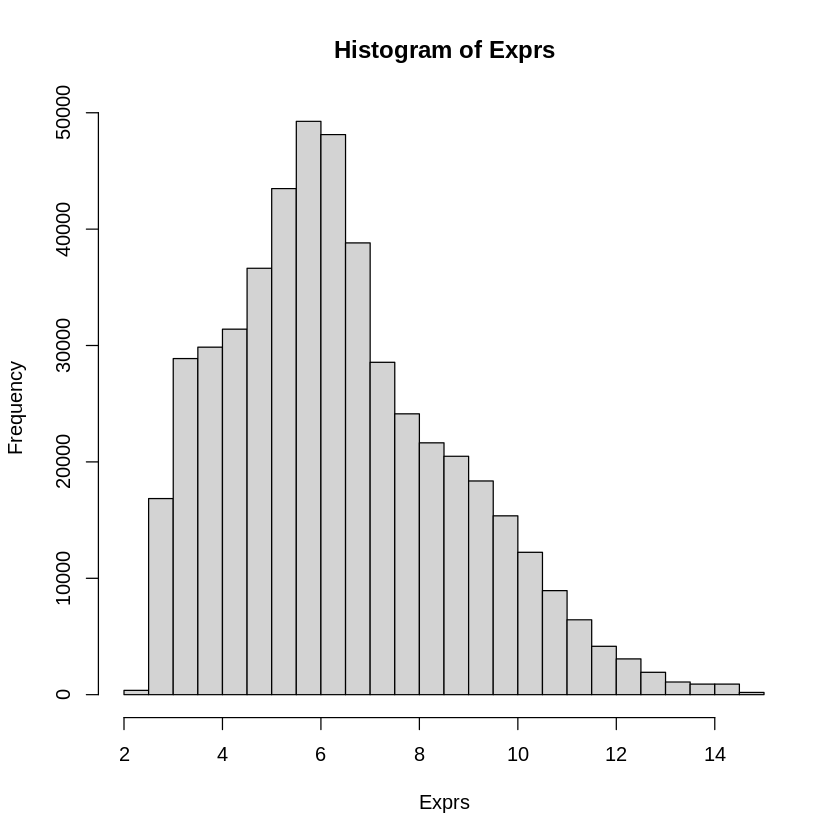

In [ ]:
# Creating histogram
hist(Exprs)

The histogram helps us to visualised that there is a right skew in this data as demonstrated by the plot density and box plot. Therefore the next steps we need to do is to normalise the data and do a bit of cleaning to get it as close as we can to a normal distribution.

**QQ-plot**

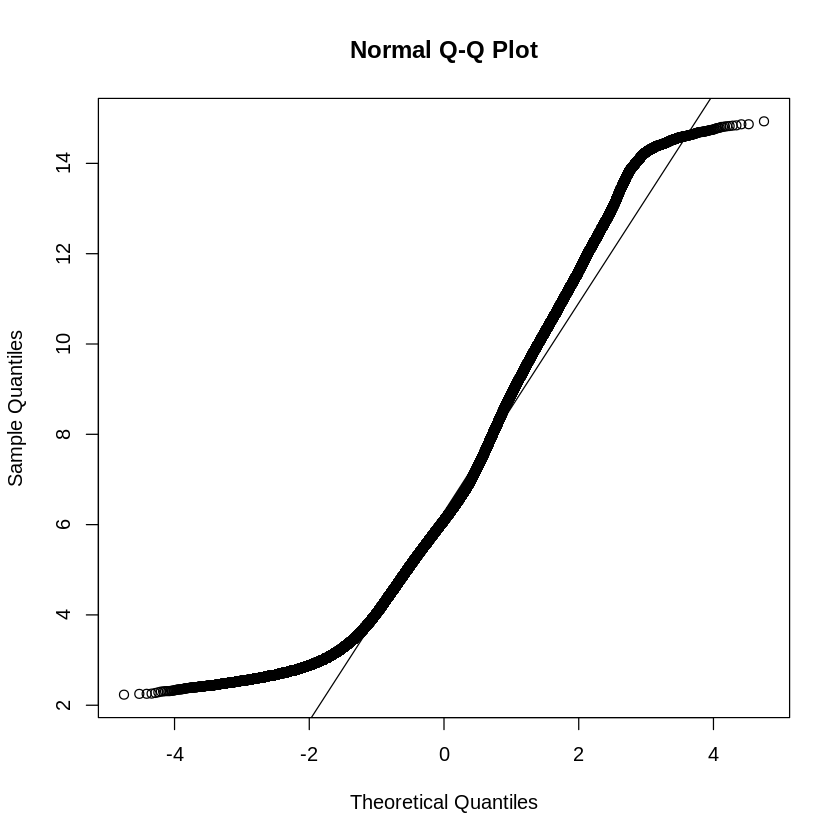

In [ ]:
# to plot the QQ- plot 
qqnorm(Exprs); qqline(Exprs)

Majority of the data points are not on the straight line indicating that the distribution is not normal therefore further cleaning is needed

# 2. Normalizing your Data

**Log Transformation**  

This will help you to better visualise the distribution of the data by increasing the distance between the small measurements and decreasing the distance between the large measurements 


In [ ]:
# log your data
Exprs <- log(Exprs)

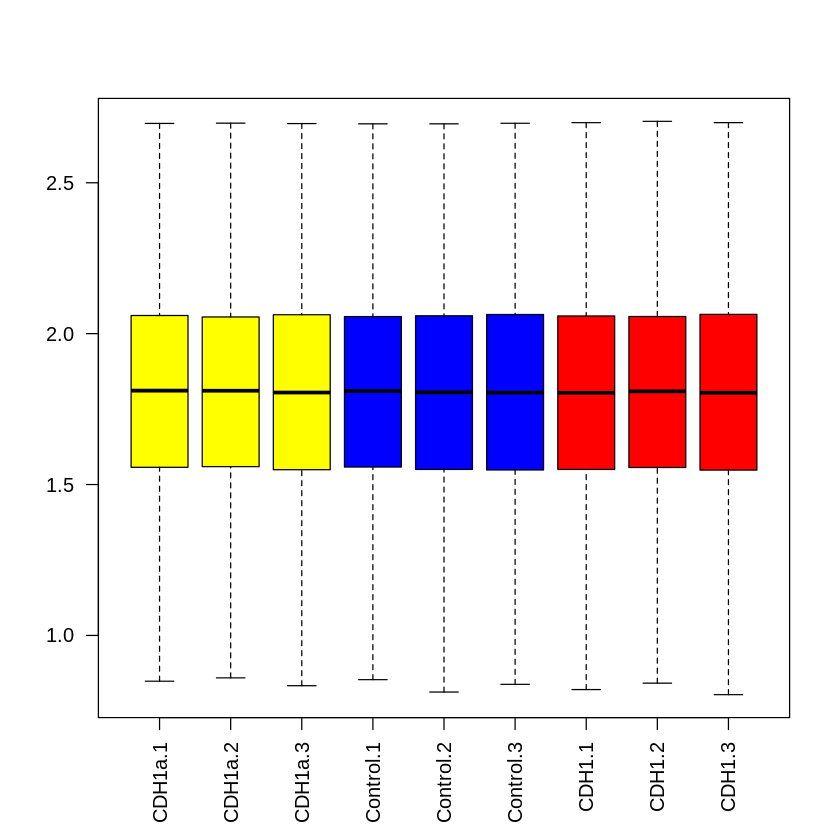

In [ ]:
# Create your box plot
boxplot(Exprs, col = colour, las =2)

After doing some log transformation, we can now see that all the outliers are gone.

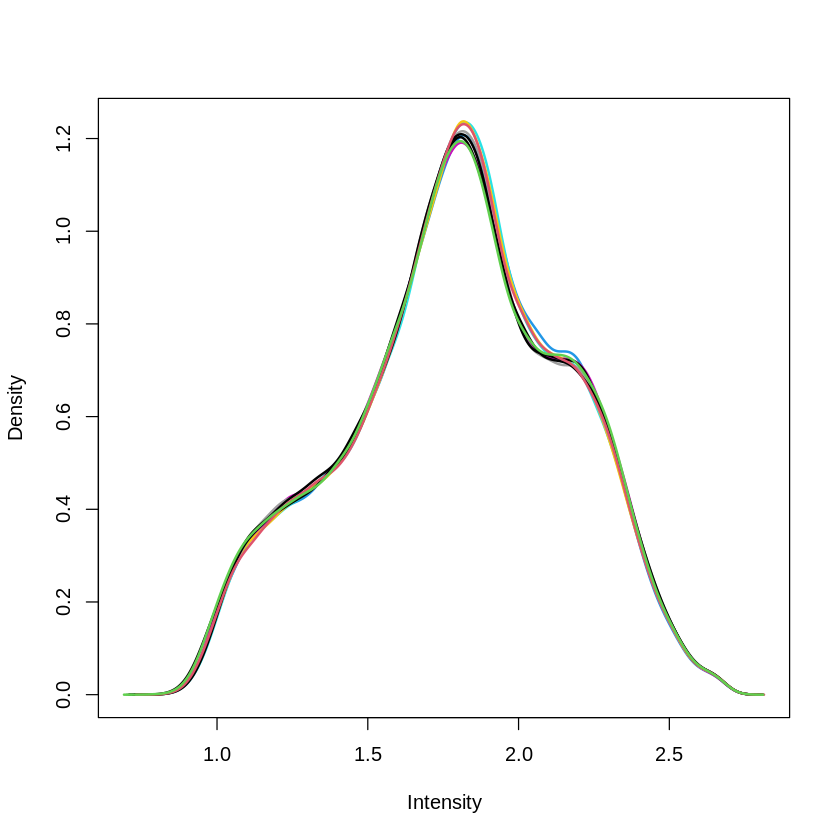

In [ ]:
# Creating Plot Density 
plotDensities(Exprs, legend = FALSE)

The data does not seemed as skewed to the right as before. As you can see in the data, the samples in the data are not aligning properly to one another thus you can see some slight 'misalignment' to one another. This is because the distribution is not the same across the samples which arises from technical artifacts that are inherent to all genomic techniques. This problem can be solved using quantile normalization in which we will see in the next step :)

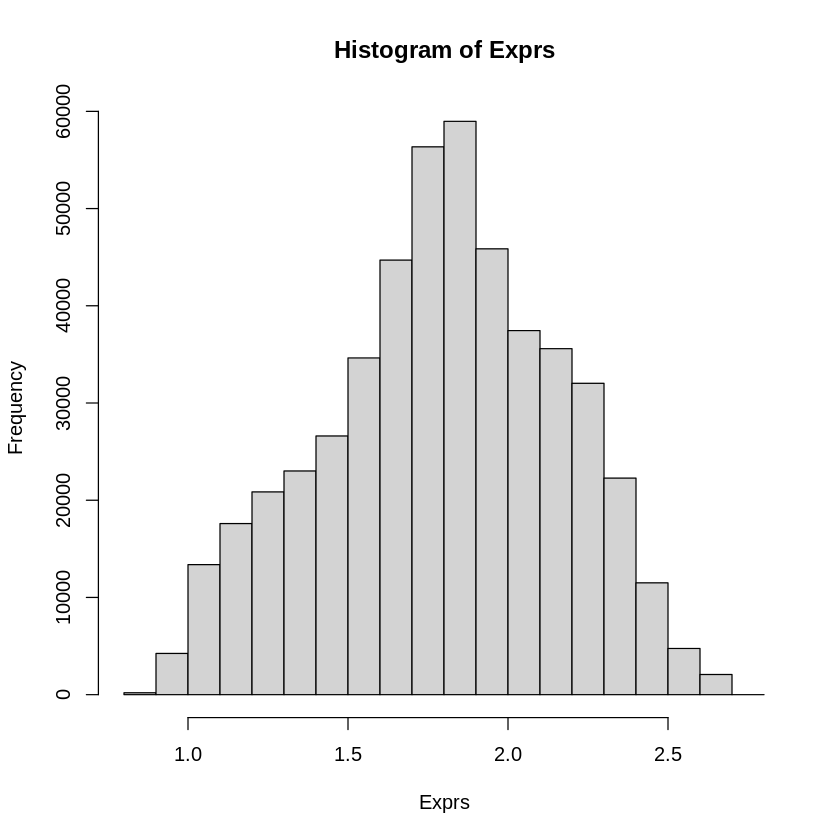

In [ ]:
# Creating histogram
hist(Exprs)

on the histogram, the data is no longer skewing to the right and it almost look normally distributed but we shall do quantile normalization before we start any analysis.

**Quantile Normalization**

This converts each samples to have the same distribution based on quantiles that are empirically computed as an average quantile across all the samples

~ Datacamp

In [ ]:
# Quantile normalization 
Exprs <- normalizeBetweenArrays(Exprs)

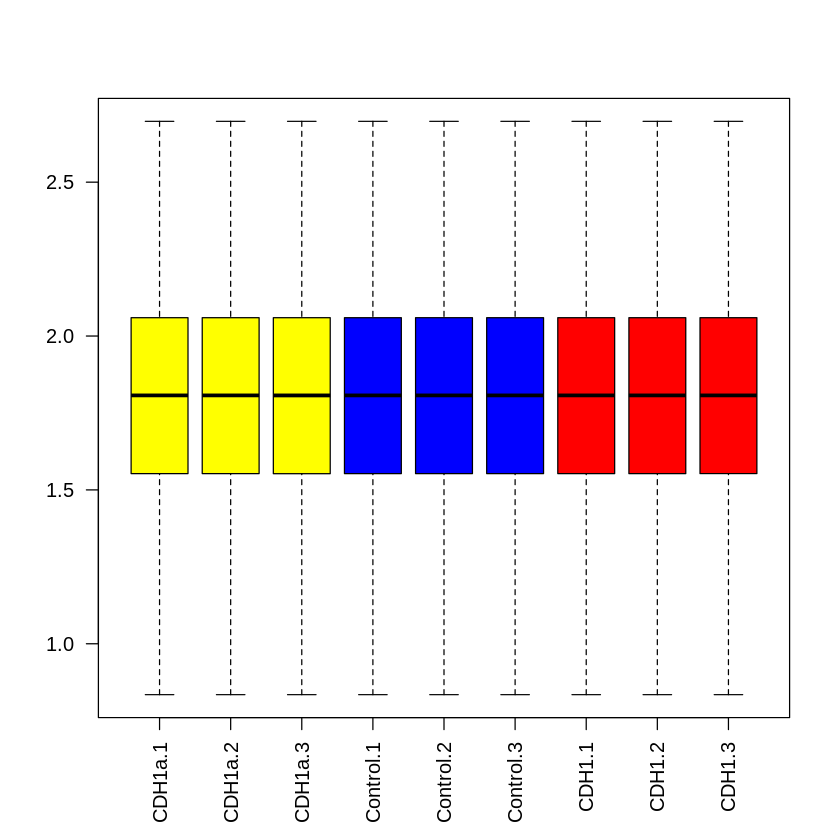

In [ ]:
# Create your box plot
boxplot(Exprs, col = colour, las =2)

From the look of the box plot, the data looks very uniformed but we will have to confirm further with the plot densities and the histogram


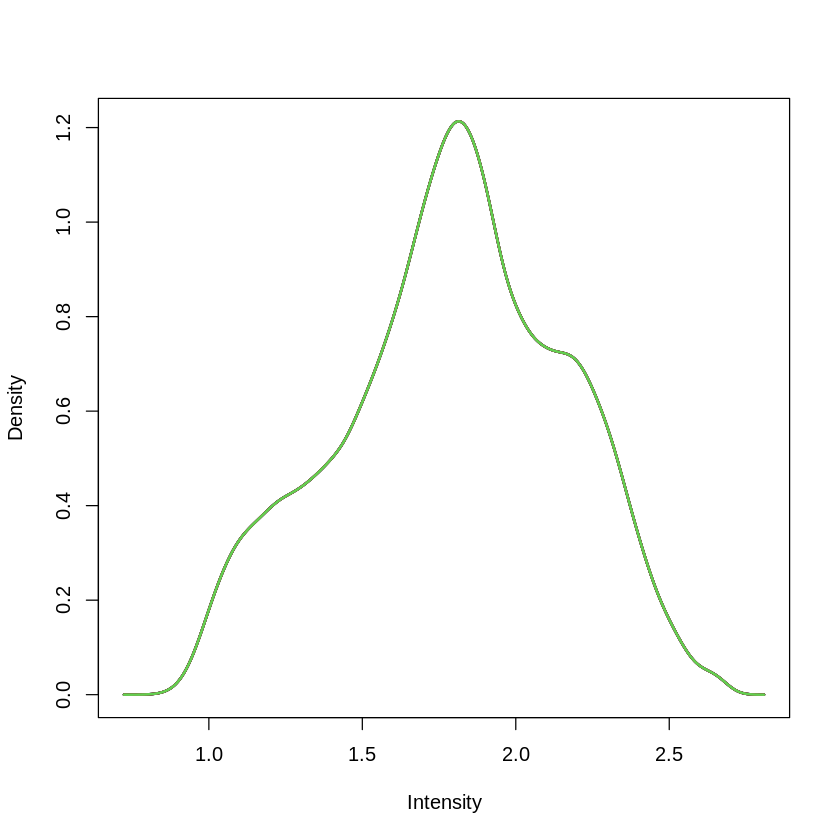

In [ ]:
# Creating Plot Density 
plotDensities(Exprs, legend = FALSE)

compared to the last plot density we can now see that each samples has the same distribution and no longer producing the 'misalignment' (where you see many different colors, now it is just one color).

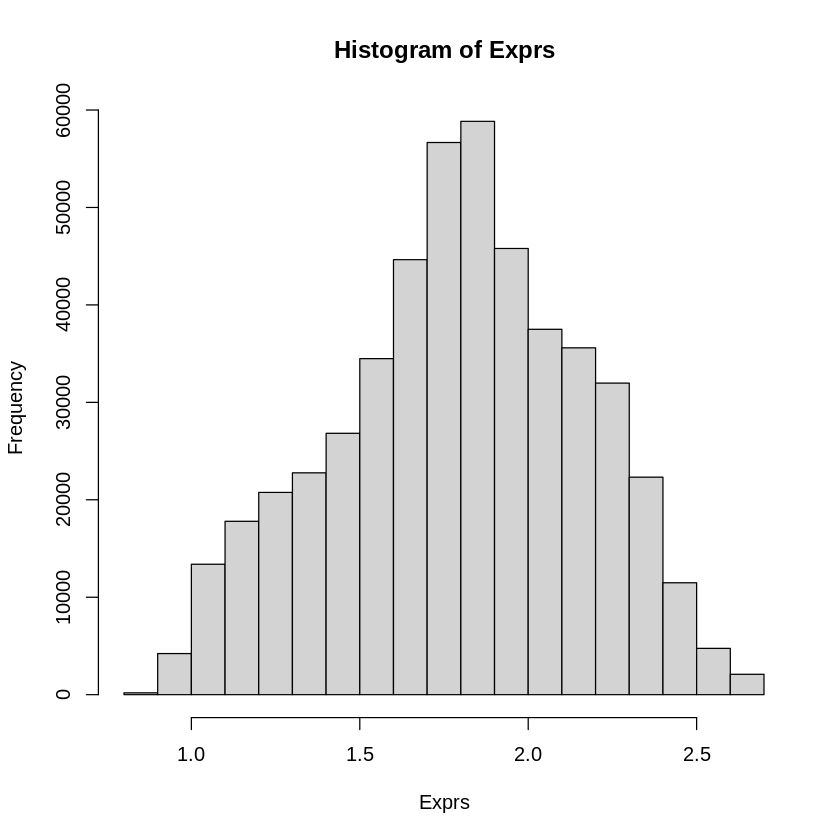

In [ ]:
# Creating histogram
hist(Exprs)

The data seem to be almost normally distributed. considering there were only 9 samples in this study this is expected. we can test further how good the distribution is by plotting a QQ-plot

**QQ-plot**

If the data is normally distributed, the points in the QQ-normal plot lie on a straight diagonal line and slight deviation is normal. You may refer to the link below: 

https://stats.stackexchange.com/questions/52293/r-qqplot-how-to-see-whether-data-are-normally-distributed#:~:text=If%20the%20data%20is%20normally,is%20the%20vector%20of%20values.&text=The%20deviations%20from%20the%20straight,This%20indicates%20normal%20distribution.

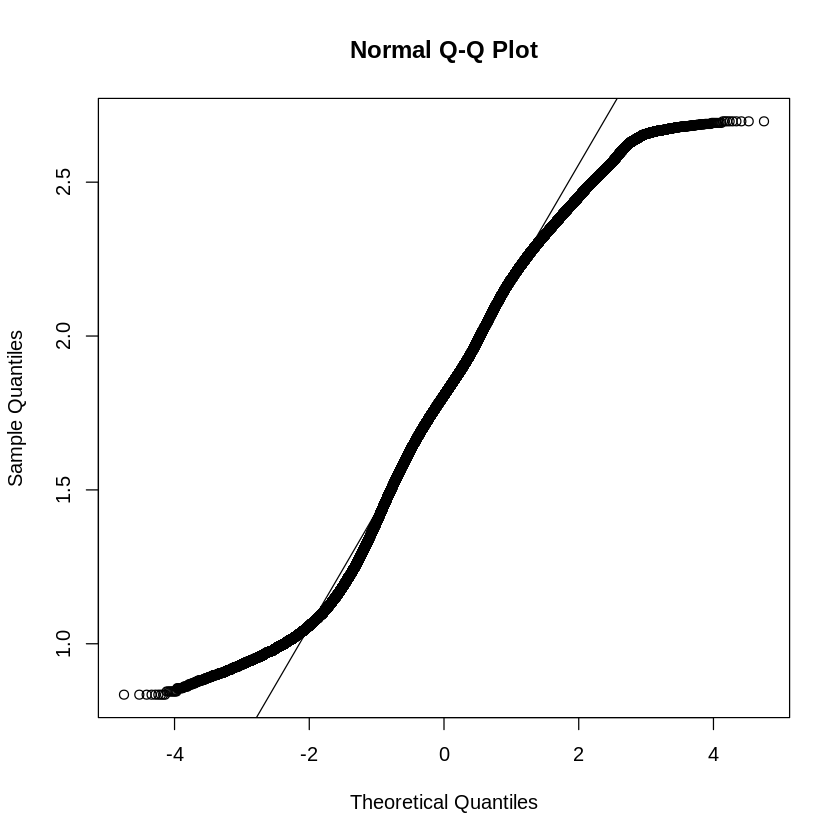

In [ ]:
# to plot the QQ- plot 
qqnorm(Exprs); qqline(Exprs)

Majority of the data points are on the straight line with slight deviation which indicates a somewhat good normal distribution.  

# 3. Filtering Your Data (optional)

Only do this part if you see if your data is right skewed or left skewed

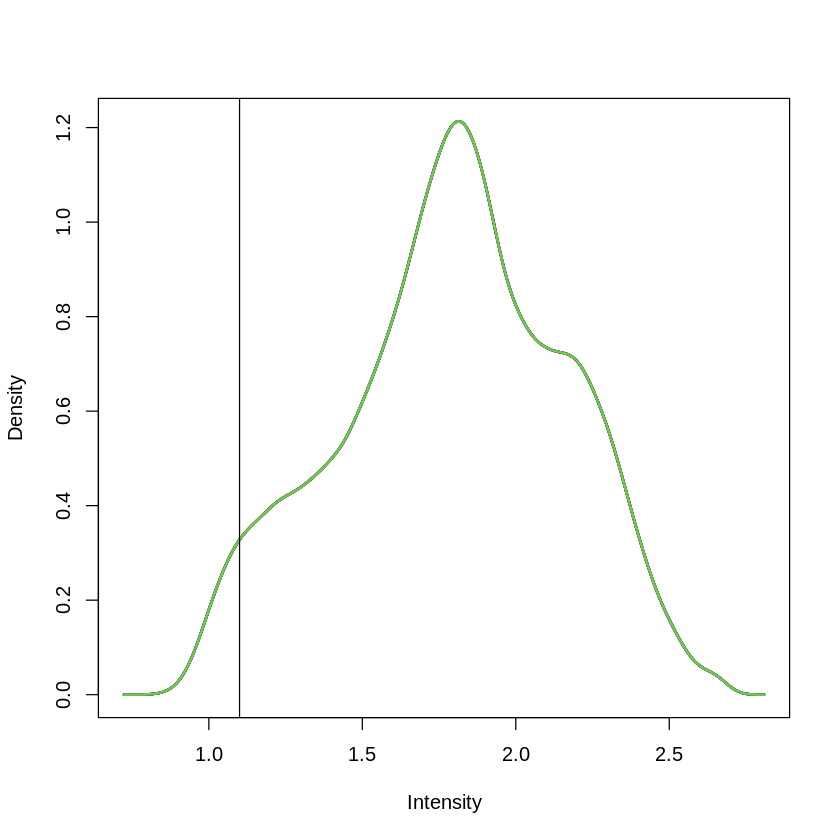

In [ ]:
# Creating Plot Density 
plotDensities(Exprs, legend = FALSE)
abline(v = 1.1)

In [ ]:
# filtering out unwanted genes and keeping only wanted genes 
# which produces TRUE or FALSE depending if the expression values meets
# the specified condition
keep <- rowMeans(Exprs) > 1.1

In [ ]:
# this is called the masking technique where expression values that is TRUE
# is kept thus extracting the wanted expression values and genes 
testing <- Exprs[keep,]

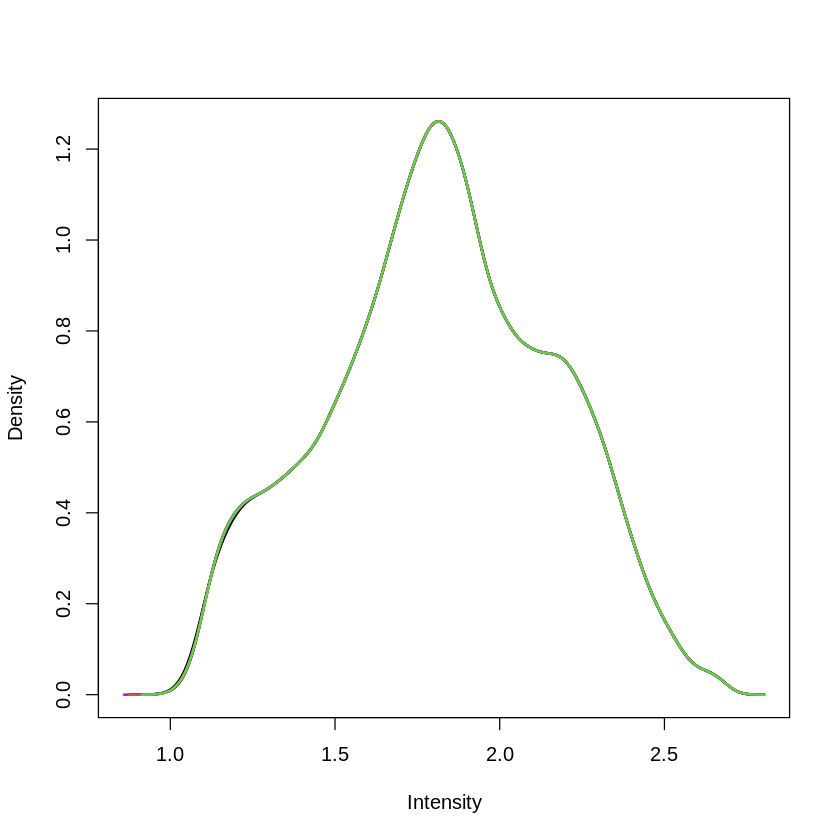

In [ ]:
# creating plot densities based on extracted expression values
plotDensities(testing, legend = FALSE)

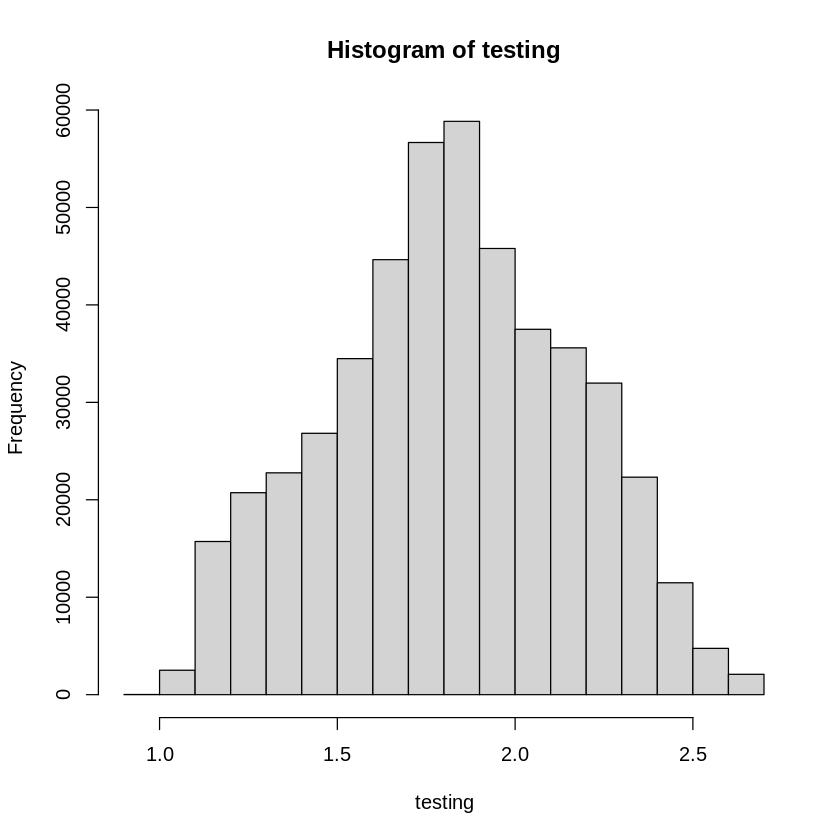

In [ ]:
# creating histogram based on extracted expression values
hist(testing)

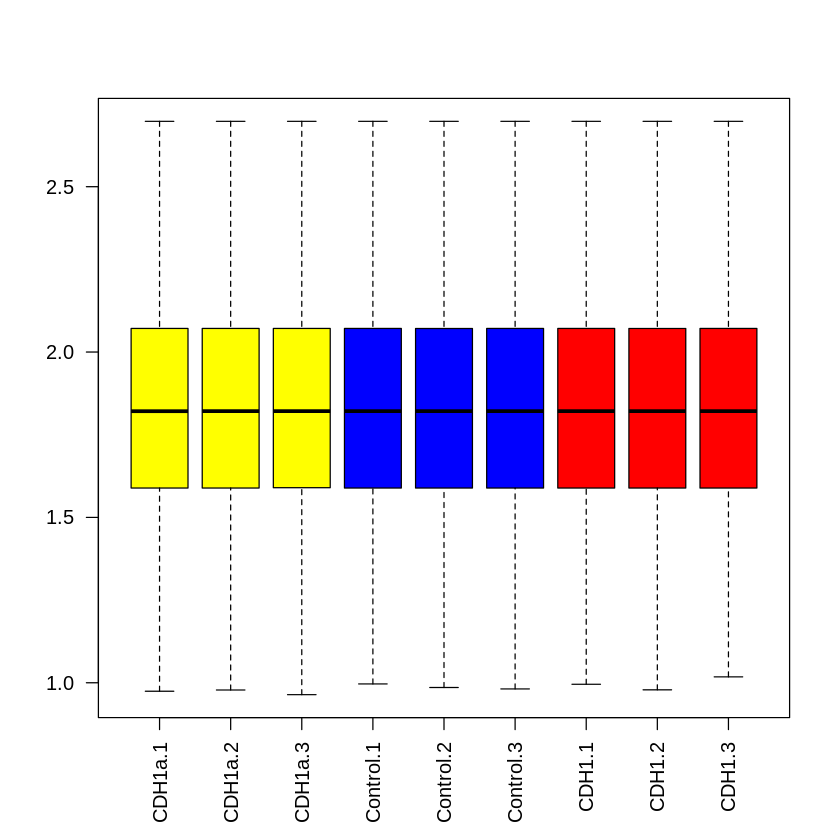

In [ ]:
# Create your box plot based on extracted expression values
boxplot(testing, col = colour, las =2)

However, I did not use the filtered data because from the last normalization that data seemed to be almost uniformed and when I filtered the data it does not make it any much better. also the sample size is small which is why it is difficult to get it to the perfect uniform distribution

# 4. Checking for any source of variation 

To visualise how well your samples cluster together you can use dimension reduction techniques such as PCA, UMAP, MDS and etc. 

These technique reduce the representation of each sample from a vector of thousands of measurements to a vector the length of the number of samples

Furthermore, this reduce vector captures the largest source of variation in the data, starting with the largest source, and each one is orthogonal, or independent to the next

If they are of the same samples typically you would see them clustering together and if one of them are not clustering together, that might mean the sample is an outlier and could have been a data entry problem. The outlier should be removed as it could affect the whole downstream statistical analysis.


**MDS**

In [ ]:
# check the var labels in eset
eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 54675 features, 9 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: CDH1a.1 CDH1a.2 ... CDH1.3 (9 total)
  varLabels: title geo_accession ... tissue origin:ch1 (37 total)
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... AFFX-TrpnX-M_at (54675 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 22752307 
Annotation: GPL570 

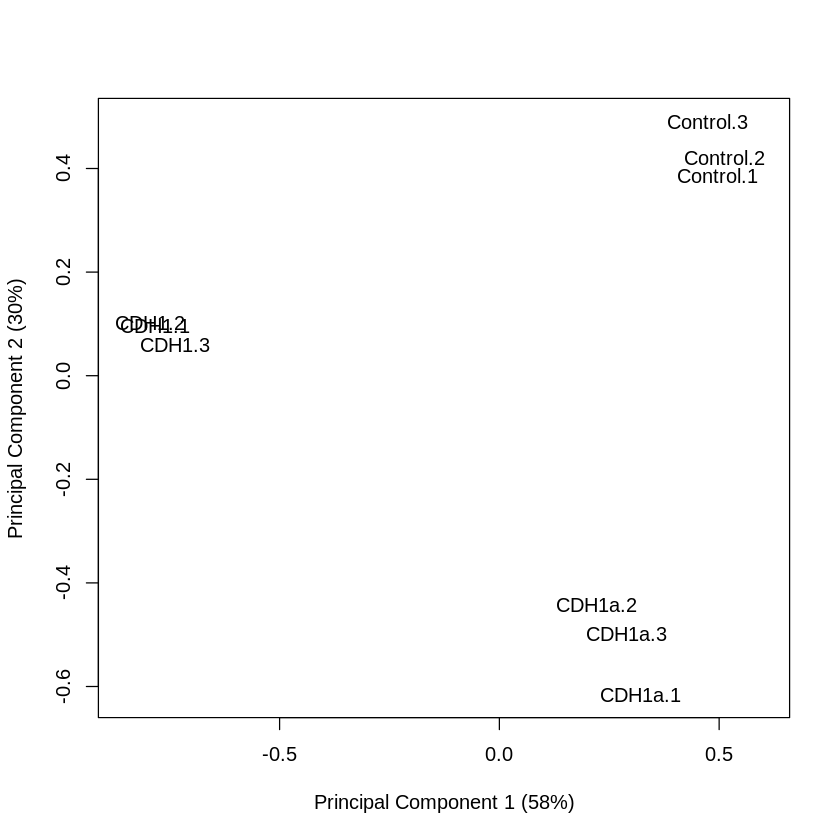

In [ ]:
# check for any variation in your sample data
plotMDS(eset, labels = sampleNames(eset), gene.selection = "common")

since each sample comes from the same source, this result is to be expected! Example CDH1.1, CDH1.2 & CDH1.3 comes from the same source where it was taken from gastric cancer that has been over expressed with CDH1 therefore they should not be very different from one another. As you can see that there is a very low source of variation in each set (CDH1, CDH1a & control). The samples are actually clustering together in their own groups which is to be expected. If one of them is not clustering together, that might mean the sample is an outlier and could have been a data entry problem. The outlier should be removed as it could affect the whole downstream statistical analysis or you could report them to the labs and have them re-checked as this will be a technical issue on their side.  Therefore no further cleaning is needed and we can head straight to the next steps!

# **Differential Expression Analysis with Limma**

---



Before we start with constructing our design and contrast matrix, it is important to determine the contrast and how many of them you have in your experiment.

Definition of contrast in this case: 
- It is finding the difference between two groups 

- or the comparison of one group with the other

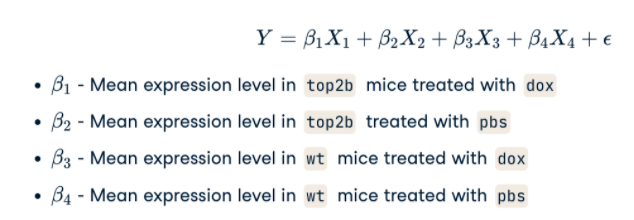

**Example**: Doxorubicin is a commonly prescribed cancer drug, unfortunately one of its side effects is cardiotoxicity. Zhang et al., 2012 tested the hypothesis that doxorubicin damages heart cells by binding to the protein topoisomerase-II beta or Top2b.

- They performed a 2X2 experiment
- They used two types of mice: genetically **normal wild type** of mice and **Top2b null mice** which had Top2b deleted specifically in their heart cells 
- They treated the mice with doxorubicin or the control solution (PBS) 
- If doxorubicin requires Top2b to exert its cardiotoxic effect, the Top2b mice should not be affected by the doxorubicin treatment 

Here we will have **3 contrasts** because:

1. We want to see the difference between wild type mice response when given doxorubicin and without

2. We want to see the difference between Top2b null mice response when given doxorubicin and without

3. Then we want to see the difference between wild type mice and Top2b null mice response to doxorubicin

adapted from datacamp



The Contrasts For This Experiment:

1. We want to see the difference between the **Gastric Cancer** with Gastric Cancer that has been **over expressed with CDH1**

2. We want to see the difference between the **Gastric Cancer** with Gastric Cancer that has been **over expressed with CDH1a**

Therefore there is **2 contrasts** in this experiment 




# 1. Construct Design Matrix

In [ ]:
# Here we are assigning samples to groups 
# for example since we have three CDH1 therefore we assign the number 1 to it three times and so on
# the factor function will then group the sample together according to these numbers
group_mem <- factor(c(1,1,1,2,2,2,0,0,0))

In [ ]:
group_mem

[1] 1 1 1 2 2 2 0 0 0
Levels: 0 1 2

In [ ]:
# this is to see the groups you have 
levels(group_mem)

[1] "0" "1" "2"

In [ ]:
# This is the code to design your design matrix, when you have more than 1 contrast 
# you would not have an intercept coefficient
# to create a model without intercept, you would add 0 in the formula
design <- model.matrix(~0 + group_mem, data = pData(eset))

In [ ]:
# to view your design matrix
design

,group_mem0,group_mem1,group_mem2
CDH1a.1,0,1,0
CDH1a.2,0,1,0
CDH1a.3,0,1,0
Control.1,0,0,1
Control.2,0,0,1
Control.3,0,0,1
CDH1.1,1,0,0
CDH1.2,1,0,0
CDH1.3,1,0,0


In [ ]:
# this is to rename the column of your design Matrix
colnames(design) <- c("CDH1","CDH1a","CT")

In [ ]:
# this is to view your design matrix after changing the column name
design

,CDH1,CDH1a,CT
CDH1a.1,0,1,0
CDH1a.2,0,1,0
CDH1a.3,0,1,0
Control.1,0,0,1
Control.2,0,0,1
Control.3,0,0,1
CDH1.1,1,0,0
CDH1.2,1,0,0
CDH1.3,1,0,0


In [ ]:
# this is to view the number of samples in each groups
colSums(design)

CDH1 CDH1a    CT 
    3     3     3

# 2. Construct Contrast Matrix

Only do this part when you have more than 1 contrast 

In [ ]:
# to create contrast matrix
# Here I have two contrasts:
# 1. I want to see what genes are involved in high expression of CDH1
# 2. I want to see what genes are involved in high expression of CDH1a
cm <- makeContrasts(CDH1_CT = CDH1 - CT, 
                    CDH1a_CT = CDH1a - CT, 
                    levels = design)

In [ ]:
# this is to view your contrast matrix
cm

,CDH1_CT,CDH1a_CT
CDH1,1,0
CDH1a,0,1
CT,-1,-1


#3. Test for differential expression

In [ ]:
# fit the design matrix
# eset is your expression matrix 
fit <- lmFit(eset, design)

In [ ]:
# to view your fitted design matrix
head(fit$coefficients,3)

,CDH1,CDH1a,CT
1007_s_at,11.318754,11.269017,11.319825
1053_at,8.105586,8.169408,8.185303
117_at,6.396242,6.593160,6.497753


In [ ]:
# fit the contrasts
fit2 <- contrasts.fit(fit, contrasts = cm)

In [ ]:
# Calculate the moderated t-statistics for the contrasts
# https://rdrr.io/bioc/limma/man/ebayes.html
fit2 <- eBayes(fit2, 0.01)

In [ ]:
fit2

An object of class "MArrayLM"
$coefficients
           Contrasts
                 CDH1_CT    CDH1a_CT
  1007_s_at -0.001071547 -0.05080769
  1053_at   -0.079716943 -0.01589467
  117_at    -0.101511586  0.09540691
  121_at    -0.011909031 -0.11050060
  1255_g_at -0.100545356 -0.01286211
54670 more rows ...

$rank
[1] 3

$assign
[1] 1 1 1

$qr
$qr
                CDH1      CDH1a         CT
CDH1a.1   -1.7320508  0.0000000  0.0000000
CDH1a.2    0.0000000 -1.7320508  0.0000000
CDH1a.3    0.0000000  0.5773503 -1.7320508
Control.1  0.0000000  0.0000000  0.5773503
Control.2  0.0000000  0.0000000  0.5773503
Control.3  0.0000000  0.0000000  0.5773503
CDH1.1     0.5773503 -0.3333333  0.0000000
CDH1.2     0.5773503 -0.3333333  0.0000000
CDH1.3     0.5773503 -0.3333333  0.0000000
attr(,"assign")
[1] 1 1 1
attr(,"contrasts")
attr(,"contrasts")$group_mem
[1] "contr.treatment"


$qraux
[1] 1.00000 1.57735 1.00000

$pivot
[1] 1 2 3

$tol
[1] 1e-07

$rank
[1] 3


$df.residual
[1] 6 6 6 6 6
54670 more el

# **Results Exploration**

---



In [ ]:
# to see the summary of the results
# this shows the number of genes are up or down regulated in each contrasts
# and also how many that are not significant 
results <- decideTests(fit2)
summary(results)

       CDH1_CT CDH1a_CT
Down      3324     1961
NotSig   48069    50638
Up        3282     2076

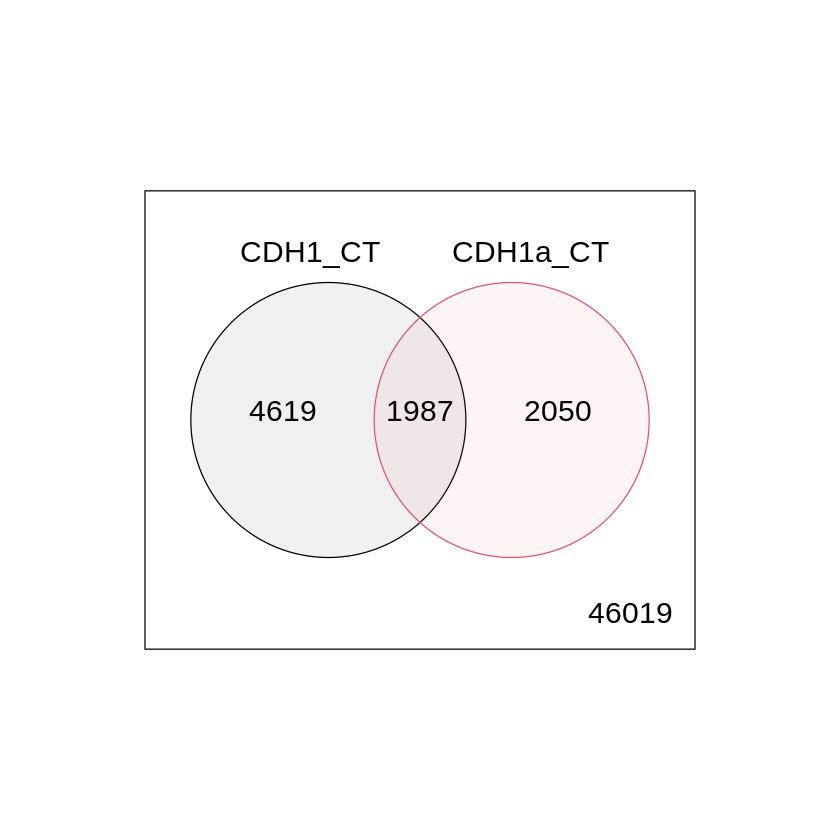

In [ ]:
# to create a venn diagram of the results
vennDiagram(results, circle.col = palette())

# 1. Top Table

The limma function ‘topTable’ will return the top differentially expressed genes 

There will be many information returned back by topTable therefore we will be extracting only the probe ID, Gene symbol, Gene Title, chromosome location, adjusted P values, P values and F statistics

Reading results from topTable:


*  The **p-value**

* **F Statistics**:  For each probe (row), the moderated F-statistic tests whether all the contrasts are zero. The F-statistic is an overall test computed from the set of t-statistics for that probe. This is exactly analogous the relationship between t-tests and F-statistics in conventional anova, except that the residual mean squares and residual degrees of freedom have been moderated between probes. This will be used to sort the level of expression as a whole.

* The **adjusted p-value** is used to control for testing multiple hypothesis which by default is computed using the Benjamini-Hochberg false discovery rate or FDR 

* **B-statistics** is used to sort the level of gene expression of a contrast (CDH1 / CDH1a)

* **Log FC** only appears when you are looking at the top table for the individual contrast (CDH1 or CDH1a). Log Fc helps us to understand how much the genes has been up regulated or down regulated. more than 0 means the genes are up regulated, less than 0 means the genes are down regulated, the increase in number indicates the intensity of the genes being upregulated and the decrease in number indicates the intensity of the genes being down regulated.

https://www.rdocumentation.org/packages/limma/versions/3.28.14/topics/ebayes


**Summary Statisics for All Genes**

These results are used because it is best to include all the genes in the downstream analysis and is so that we dont end up sacrificing any significant genes.

In [ ]:
# to obtain summary statistics for all genes 
# To do this, pass the number of rows in ‘fit2’ object to the ‘topTable’ argument ‘number’ 
# Furthermore, disable sorting by statistical significance by setting the ‘sort.by’ argument to “none”.
# This will maintain the same row ordering in the results as the original ExpressionSet object,
# making it easier to compare and/or combine the results with the input data 

Stats <- topTable(fit2, adjust = "fdr", sort.by = "F", number = nrow(fit2))

In [ ]:
# to check the number of rows and columns we have 
dim(Stats)

[1] 54675    27

**Summary Statistics for top 250 genes**

This is only for display purposes, it is not used in the downstream analysis because we do not want to loose any important genes. 250 was selected here for display because google colab can not handle big data. Also, you can choose any number you would like to display, it doesnt have to be 250 and also depends on the RAM that are available to you .

In [ ]:
# compute statistics and table of top significant genes by sorting it with F statistics
tT <- topTable(fit2, adjust = "fdr", sort.by="F", number=250) 

In [ ]:
# this is to view the column names in tT data frame
colnames(tT)

[1] "ID"                    "Gene.title"            "Gene.symbol"          
 [4] "Gene.ID"               "UniGene.title"         "UniGene.symbol"       
 [7] "UniGene.ID"            "Nucleotide.Title"      "GI"                   
[10] "GenBank.Accession"     "Platform_CLONEID"      "Platform_ORF"         
[13] "Platform_SPOTID"       "Chromosome.location"   "Chromosome.annotation"
[16] "GO.Function"           "GO.Process"            "GO.Component"         
[19] "GO.Function.ID"        "GO.Process.ID"         "GO.Component.ID"      
[22] "CDH1_CT"               "CDH1a_CT"              "AveExpr"              
[25] "F"                     "P.Value"               "adj.P.Val"

In [ ]:
# Extracting the appropriate columns from the topTable and displaying them
tT <- subset(tT, select=c("ID","adj.P.Val","P.Value","F","Gene.symbol","Gene.title", "Gene.ID", "GO.Component"))
#write.table(tT, file=stdout(), row.names=F, sep="\t")
tT

,ID,adj.P.Val,P.Value,F,Gene.symbol,Gene.title,Gene.ID,GO.Component
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
204205_at,204205_at,1.102274e-09,2.016048e-14,1420.0422,APOBEC3G,apolipoprotein B mRNA editing enzyme catalytic subunit 3G,60489,apolipoprotein B mRNA editing enzyme complex///cytoplasm///cytoplasmic mRNA processing body///cytosol///intracellular ribonucleoprotein complex
201130_s_at,201130_s_at,3.574134e-09,1.307411e-13,1022.1462,CDH1,cadherin 1,999,actin cytoskeleton///aggresome///apical junction complex///catenin complex///cell junction///cell junction///cell-cell adherens junction///colocalizes_with cortical actin cytoskeleton///cytoplasm///cytoplasmic side of plasma membrane///endosome///extracellular exosome///extracellular region///flotillin complex///focal adhesion///integral component of membrane///lamellipodium///lateral plasma membrane///perinuclear region of cytoplasm///plasma membrane///plasma membrane///trans-Golgi network
214995_s_at,214995_s_at,3.973509e-08,2.180252e-12,622.3839,APOBEC3F///APOBEC3G,apolipoprotein B mRNA editing enzyme catalytic subunit 3F///apolipoprotein B mRNA editing enzyme catalytic subunit 3G,200316///60489,apolipoprotein B mRNA editing enzyme complex///cytoplasm///cytoplasmic mRNA processing body///intracellular ribonucleoprotein complex///apolipoprotein B mRNA editing enzyme complex///cytoplasm///cytoplasmic mRNA processing body///cytosol///intracellular ribonucleoprotein complex
209875_s_at,209875_s_at,4.918091e-08,3.598055e-12,569.6557,SPP1,secreted phosphoprotein 1,6696,cell projection///extracellular exosome///extracellular region///extracellular space///perinuclear region of cytoplasm
204112_s_at,204112_s_at,6.450746e-08,5.899174e-12,521.9571,HNMT,histamine N-methyltransferase,3176,cytoplasm///cytosol///extracellular exosome///neuron projection///nucleoplasm
206332_s_at,206332_s_at,1.030943e-07,1.131350e-11,465.1148,IFI16,interferon gamma inducible protein 16,3428,cytoplasm///cytosol///membrane///nuclear speck///nucleolus///nucleoplasm///nucleus
209230_s_at,209230_s_at,1.393942e-07,1.784654e-11,429.0105,NUPR1,"nuclear protein 1, transcriptional regulator",26471,cytoplasm///nucleus
208966_x_at,208966_x_at,1.497536e-07,2.191183e-11,413.6724,IFI16,interferon gamma inducible protein 16,3428,cytoplasm///cytosol///membrane///nuclear speck///nucleolus///nucleoplasm///nucleus
226785_at,226785_at,2.001880e-07,3.295276e-11,384.7637,ATP11C,ATPase phospholipid transporting 11C,286410,endoplasmic reticulum///endoplasmic reticulum membrane///integral component of membrane///lysosomal membrane///plasma membrane///plasma membrane///recycling endosome


**Summary Statistics for CDH1**

In [ ]:
# to obtain summary statistics for CDH1 is by setting the coef value to 1
# Disabling sorting by statistical significance by setting the ‘sort.by’ argument to “none”
# will maintain the same row ordering in the results as the original ExpressionSet object,
# making it easier to compare and/or combine the results with the input data 

CDH1_tt <- topTable(fit2, coef = 1, adjust="fdr", sort.by = "B", number = nrow(fit2))

In [ ]:
# note that this doesnt change the number of genes/rows
dim(CDH1_tt)

[1] 54675    27

In [ ]:
# when you take summary statistics for each coefficient only 
# then you will see the logFC 
# because logFC is generated by taking a difference between two means
# the mean of the control and the mean of one of the variable(CDH1/CDH1a)
# which is why you dont see the logFC in the full summary statistics
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_Fold_Change_of_Two_Means.pdf
colnames(CDH1_tt)

[1] "ID"                    "Gene.title"            "Gene.symbol"          
 [4] "Gene.ID"               "UniGene.title"         "UniGene.symbol"       
 [7] "UniGene.ID"            "Nucleotide.Title"      "GI"                   
[10] "GenBank.Accession"     "Platform_CLONEID"      "Platform_ORF"         
[13] "Platform_SPOTID"       "Chromosome.location"   "Chromosome.annotation"
[16] "GO.Function"           "GO.Process"            "GO.Component"         
[19] "GO.Function.ID"        "GO.Process.ID"         "GO.Component.ID"      
[22] "logFC"                 "AveExpr"               "t"                    
[25] "P.Value"               "adj.P.Val"             "B"

In [ ]:
# Extracting gene symbol, gene id, chromosome location and all the statistics from the CDH1tt
# filtering only for genes with adj p values <= 0.05 and logFC >2
# the abs() converts all the negative values to positive and maintains positive
# As you can see here, when you sort by B statistics, it is able to sort the level of gene expression correctly
# on the logFC without as though it has been converted to positive
# logFC of 2 and -2 is the same as the genes has changed two folds in either up regulation or down regulation
# Here we are trying to sort them by the level of intensity which is why we sort it by B statistics

CDH1_stats <- subset(CDH1_tt, select=c("Gene.symbol",'Gene.ID','Chromosome.location', 'logFC','AveExpr', 't', 'P.Value','adj.P.Val','B'), adj.P.Val <= 0.05 & abs(logFC) > 2 )
head(CDH1_stats)

,Gene.symbol,Gene.ID,Chromosome.location,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
204205_at,APOBEC3G,60489,22q13.1-q13.2,5.235074,7.165048,47.86566,1.582997e-14,8.655034e-10,19.63317
209875_s_at,SPP1,6696,4q22.1,4.871315,6.152131,32.32698,1.360393e-12,3.718975e-08,17.46017
214995_s_at,APOBEC3F///APOBEC3G,200316///60489,22q13.1///22q13.1-q13.2,2.502847,7.117913,29.45254,3.896685e-12,7.101708e-08,16.81071
206332_s_at,IFI16,3428,1q22,-3.896258,6.929873,-27.68043,7.846843e-12,1.072565e-07,16.35052
208966_x_at,IFI16,3428,1q22,-3.562652,6.921298,-26.18098,1.469236e-11,1.606610e-07,15.91959
209230_s_at,NUPR1,26471,16p11.2,2.526364,7.210087,25.00613,2.462116e-11,1.989096e-07,15.55207


**Summary Statistics for CDH1a**

In [ ]:
# to obtain summary statistics for CDH1 is by setting the coef value to 1
# Disabling sorting by statistical significance by setting the ‘sort.by’ argument to “none”
# will maintain the same row ordering in the results as the original ExpressionSet object,
# making it easier to compare and/or combine the results with the input data 

CDH1a_tt <- topTable(fit2, coef = 2, adjust="fdr", sort.by = "B", number = nrow(fit2))

In [ ]:
# note that this doesnt change the number of genes/rows
dim(CDH1a_tt)

[1] 54675    27

In [ ]:
# when you take summary statistics for each coefficient only 
# then you will see the logFC 
# because logFC is generated by taking a difference between two means
# the mean of the control and the mean of one of the variable(CDH1/CDH1a)
# which is why you dont see the logFC in the full summary statistics
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_Fold_Change_of_Two_Means.pdf
colnames(CDH1a_tt)

[1] "ID"                    "Gene.title"            "Gene.symbol"          
 [4] "Gene.ID"               "UniGene.title"         "UniGene.symbol"       
 [7] "UniGene.ID"            "Nucleotide.Title"      "GI"                   
[10] "GenBank.Accession"     "Platform_CLONEID"      "Platform_ORF"         
[13] "Platform_SPOTID"       "Chromosome.location"   "Chromosome.annotation"
[16] "GO.Function"           "GO.Process"            "GO.Component"         
[19] "GO.Function.ID"        "GO.Process.ID"         "GO.Component.ID"      
[22] "logFC"                 "AveExpr"               "t"                    
[25] "P.Value"               "adj.P.Val"             "B"

In [ ]:
# Extracting gene symbol, gene id, chromosome location and all the statistics from the CDH1tt
# filtering only for genes with adj p values <= 0.05 and logFC >2
# the abs() converts all the negative values to positive and maintains positive

CDH1a_stats <- subset(CDH1a_tt, select=c("Gene.symbol",'Gene.ID','Chromosome.location', 'logFC','AveExpr', 't', 'P.Value','adj.P.Val','B'), adj.P.Val <= 0.05 & abs(logFC) > 2 )
head(CDH1a_stats)

,Gene.symbol,Gene.ID,Chromosome.location,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
201130_s_at,CDH1,999,16q22.1,5.310197,8.020721,39.34519,1.468159e-13,8.027159e-09,17.30925
204112_s_at,HNMT,3176,2q22.1,3.614013,6.574602,32.30884,1.369056e-12,3.742657e-08,16.35632
227145_at,LOXL4,84171,10q24,2.329603,9.646599,25.41430,2.052462e-11,3.740611e-07,14.88948
228256_s_at,EPB41L4A,64097,5q21.3,-2.130425,5.225960,-23.30141,5.438115e-11,5.517084e-07,14.27739
226785_at,ATP11C,286410,Xq27.1,-2.030859,6.148487,-23.07925,6.054413e-11,5.517084e-07,14.20730
218804_at,ANO1,55107,11q13.3,-3.997272,7.486338,-21.95905,1.056660e-10,8.253270e-07,13.83535


In [ ]:
dim(CDH1a_stats)

[1] 16  9

# 2. Histogram of P-Values

One useful visualisation is a p-value histogram.
Under the null hypothesis of **no differential expression**, you’d expect the **p-values** to be **uniformly distributed**.

However, if you were to find a lot of **differentially expressed genes**, you’d expect to see a **right skewed** histogram with a **large peak close** to 0 due to the many statistically  significant p-values

However, if you observe any deviation from one of these two patterns, you should review your code, especially your design and contrasts matrix, to ensure that you have tested the correct hypothesis.

---




Summary:

**Right skewed** = many differentially expressed genes

**Uniform Distribution** = few differentially expressed genes

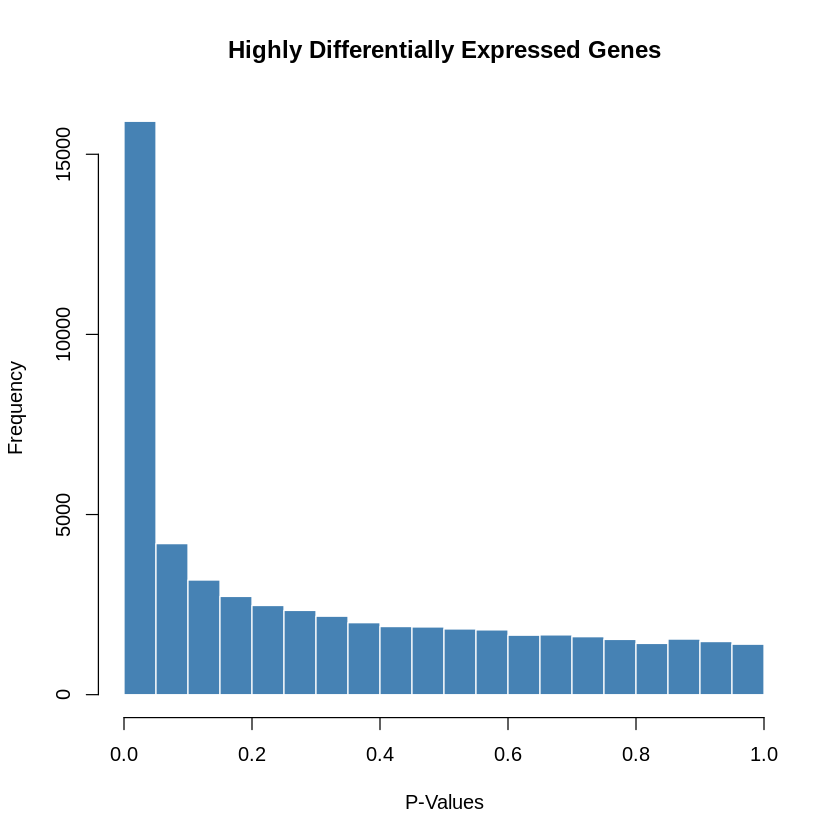

In [ ]:
hist(Stats[,"P.Value"], main = "Highly Differentially Expressed Genes",xlab = "P-Values", col = "steelblue", border = "white")

Our p histogram is right skewed with a large peak close to 0 therefore we have a lot of differentially expressed genes therefore we can continue on to visualise our results.

# 3. Heatmap

Creating heatmap with the whole list of genes was used from the Top Table


https://www.r-graph-gallery.com/215-the-heatmap-function.html

https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/r/heatmap

https://towardsdatascience.com/pheatmap-draws-pretty-heatmaps-483dab9a3cc

Initially, the intention was to change the probename to gene name but after throrough investigation. It turns out that not all genes has gene symbol/gene name but all genes has probename. which is why the heatmap is just left with probe name


In [ ]:
# to view how many genes that we have
dim(Stats)

[1] 54675    27

In [ ]:
# to view the column names in your Stats dataframe
colnames(Stats)

[1] "ID"                    "Gene.title"            "Gene.symbol"          
 [4] "Gene.ID"               "UniGene.title"         "UniGene.symbol"       
 [7] "UniGene.ID"            "Nucleotide.Title"      "GI"                   
[10] "GenBank.Accession"     "Platform_CLONEID"      "Platform_ORF"         
[13] "Platform_SPOTID"       "Chromosome.location"   "Chromosome.annotation"
[16] "GO.Function"           "GO.Process"            "GO.Component"         
[19] "GO.Function.ID"        "GO.Process.ID"         "GO.Component.ID"      
[22] "CDH1_CT"               "CDH1a_CT"              "AveExpr"              
[25] "F"                     "P.Value"               "adj.P.Val"

In [ ]:
# here I am only selecting the gene probes that has an adj.P.Val that is below 0.05
# this is because values that are below 0.05 are known to be significantly DEGs
# where there is a significant difference between these genes and the null hypothesis 
# also, it turns out that there is only 9422 genes that are significant
sel_Stats <- subset(Stats, select = c("adj.P.Val", "Gene.symbol"), adj.P.Val <= 0.05)
dim(sel_Stats)

[1] 9422    2

In [ ]:
# here I am extracting the probe names that are known to have adj.P.Val that is below 0.05
sel_Statprob <- rownames(sel_Stats)

In [ ]:
 # here I am extracting the selected probs from the expression matrix class 
 # and obtaining expression matrix values as how it was done earlier using the exprs
 # then we would need to scale these extracted values but befor we can do that we need to transpose the matrix
 # then you would need to transpose it back after scaling 
 # scaling helps to standardise the data or normalise the data because some data have a large variation 
 # in the range, so we need to scale them to keep the heatmap from being dominated by the large values
 # https://towardsdatascience.com/pheatmap-draws-pretty-heatmaps-483dab9a3cc
 
heat <-  t(scale(t(exprs(eset[sel_Statprob,]))))

In [ ]:
#@title
# here we create the heatmap from our filtered/extracted data
# so the heatmap only consist of genes that are significantly differentially expressed
heatmap(heat)

Here the darker colors represents up regulation and the lighter color represents down regulation however, the transition between up and down regulation doesnt seem that clear so lets use more contrasting colors :)

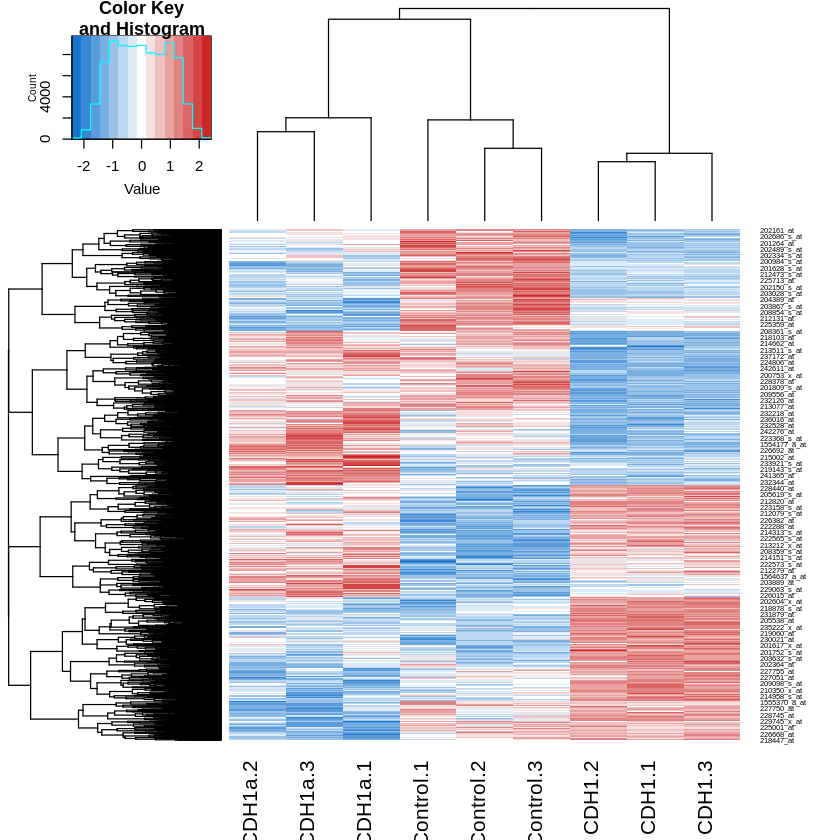

In [ ]:
# this is just another way of creating a heatmap, the difference is that, here it allows you to create 
# a figure legend, where as heatmap does not support figure legend
# you can change your colours and select your colors from this document:
# http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf 
heatmap.2(heat, trace = "none", col = colorRampPalette(c("dodgerblue3","white","firebrick3")))

now we can see the differences much better with the contrasting color and the intesity of the expression.

However, here I would like to just focus on the top 250 differentially expressed genes instead.


In [ ]:
# here I am only selecting the gene probes that has an adj.P.Val that is below 0.05
# this is because values that are below 0.05 are known to be significantly DEGs
# where there is a significant difference between these genes and the null hypothesis 
# also, it turns out that there is only 250 genes that are significant
sel_tT <- subset(tT, select = c("adj.P.Val"), adj.P.Val <= 0.05)
dim(sel_tT)

[1] 250   1

In [ ]:
# here I am extracting the probe names that are known to have adj.P.Val that is below 0.05
sel_prob <- rownames(sel_tT)

In [ ]:
 # here I am extracting the selected probs from the expression matrix class 
 # and obtaining expression matrix values as how it was done earlier using the exprs
 # then we would need to scale these extracted values but befor we can do that we need to transpose the matrix
 # then you would need to transpose it back after scaling 
 # scaling helps to standardise the data or normalise the data because some data have a large variation 
 # in the range, so we need to scale them to keep the heatmap from being dominated by the large values
 # https://towardsdatascience.com/pheatmap-draws-pretty-heatmaps-483dab9a3cc 
 
 heat2 <- t(scale(t(exprs(eset[sel_prob,]))))
 head(heat2)

,CDH1a.1,CDH1a.2,CDH1a.3,Control.1,Control.2,Control.3,CDH1.1,CDH1.2,CDH1.3
204205_at,-0.5833222,-0.5831985,-0.5897411,-0.8441561,-0.6712344,-0.7137005,1.37794550,1.27844551,1.32896191
201130_s_at,1.2189121,1.4440030,1.3282813,-0.7322542,-0.6915957,-0.6008355,-0.66580749,-0.64492323,-0.65578028
214995_s_at,-0.7210475,-0.7910072,-0.6857834,-0.5280945,-0.6022970,-0.6566932,1.35737927,1.40525001,1.22229359
209875_s_at,-0.2891380,-0.3936675,-0.4631345,-1.0091506,-0.7402947,-0.9816826,1.26917415,1.35615609,1.25173770
204112_s_at,1.1899154,1.1949805,1.0805561,-1.1990143,-1.2656183,-0.9724550,0.01349267,0.01349267,-0.05534973
206332_s_at,0.4710964,0.6124421,0.5879631,0.8203460,0.8723752,0.6001794,-1.20536790,-1.42431643,-1.33471787


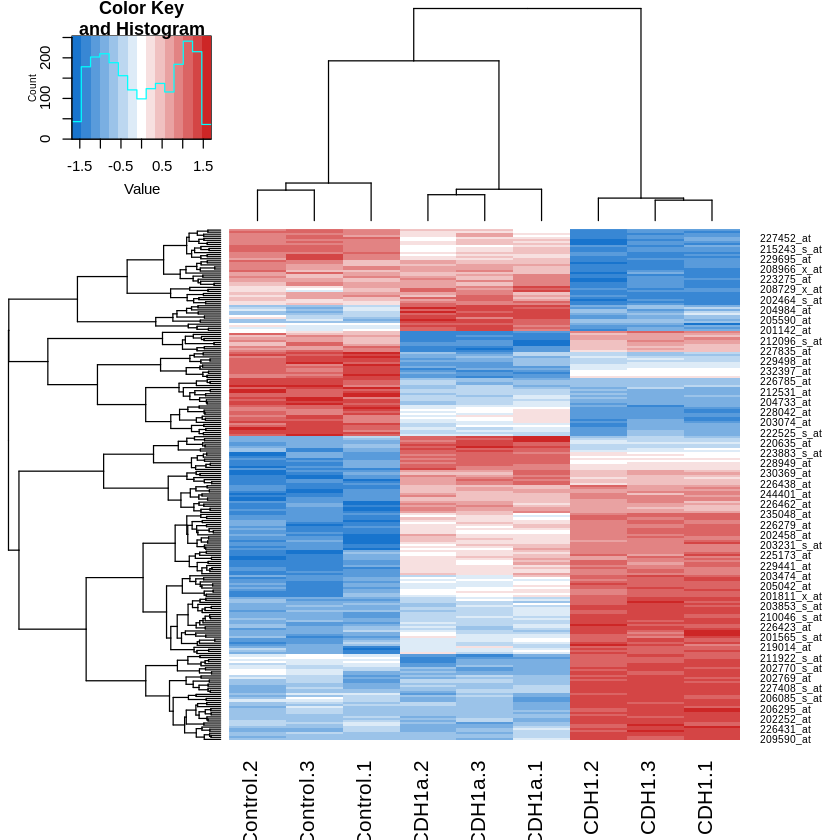

In [ ]:
# this is just another way of creating a heatmap, the difference is that, here it allows you to create 
# a figure legend, where as heatmap does not support figure legend
# you can change your colours and select your colors from this document:
# http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf 
heatmap.2(heat2, trace = "none", col = colorRampPalette(c("dodgerblue3","white","firebrick3")))

**Red:** Indicates up-regulation

**Blue:** Indicates down-regulation

**White:** Indicates no change in regulation

When comparing between the control and CDH1, they have opposite expression and When we look at the vertical phylogenetic tree, it also suggest that it is very different from the original gastric cancer (control). Which proves the theory that CDH1 is a tumour supressor as suggested by some studies (Shenoy, 2019). 

When comparing the expression of CDH1a with the control, it seems to share a lot of similarities with the control with only slight changes.

When we look at the vertical phylogenetic three above the heatmap, we can see that CDH1 is closely related to the Gastric cancer than CDH1 which indicates that cdh1a may play a role in gastric cancer.

# 4. Visualisation with Volcano Plot

Understanding Volcano Plot:



*   On the x-axis is the log-fold change
*   On the y-axis is the log odds of differential expression, the higher the log odds, the more likely the genes is differentially expressed, which is why the top 5 labelled genes are at the very top of the plot 

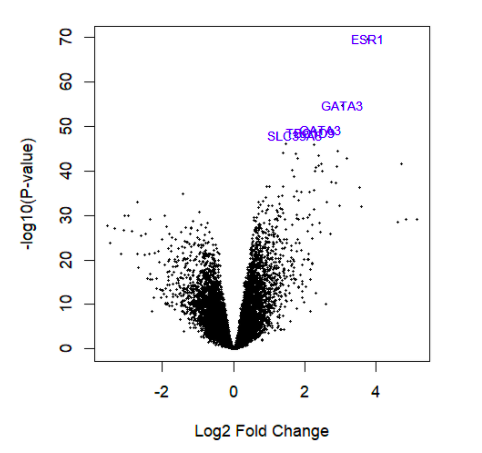





*   Volcano Plot should typically have this shape because genes that have a larger log-fold change are more likely to be differentially expressed
*   However, always make sure to note the range on the x and y axes because this shape does not guarantee that the genes are differentially expressed



Example of low expression of volcano plot:

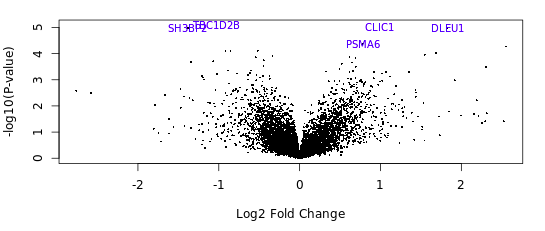

Adapted from DataCamp

Interpretting the Volcano Plot:
- the right side of the volcano plot represents the genes that are up regulated
- the left side of the volcano plot represents the genes that are down regulated 
- the further up the points are the higher its differential expression is compared to the rest
- the lower down the plot and the closer it is to the 0 point of the log2 fold change the gene becomes less differentially expressed or in other words it becomes insignificant / not significantly expressed

https://www.google.com/url?q=https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-volcanoplot/tutorial.html&sa=D&source=editors&ust=1616152576446000&usg=AFQjCNFYecPB_uh9z44k6j7WKQUFlv38Vg


https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-volcanoplot/tutorial.html

**CDH1 Volcano Plot**

In [ ]:
# list contrast names
colnames(fit2) 

[1] "CDH1_CT"  "CDH1a_CT"

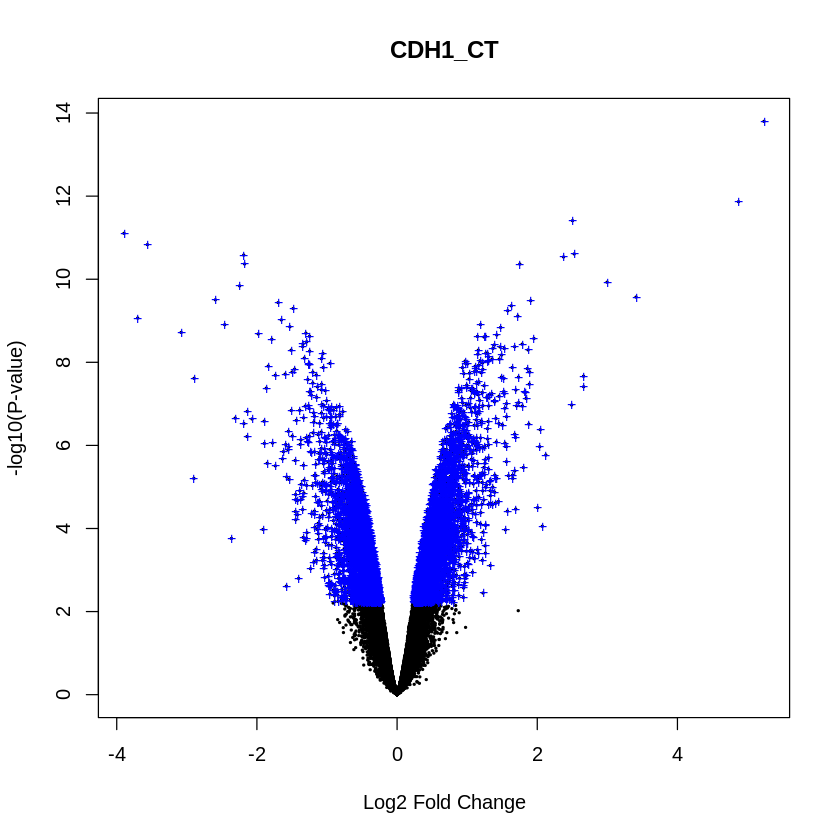

In [ ]:
 # Coef section:
 # This is where you would like to specify which contrast you would like the volcano be plotted on
 # Here I am choosing CDH1 as my contrast and it happens to be at position 1

 # Main section:
 # this would normally what you would like the title of the volcano plot be
 # here I chose the title of the volcano plot to be CDH1 which is located at index 1 on the colnames of fit2

 # pch section:
 # this can be any number, what it is essentially is to change the shape of the plot
 # 20 would mean that the shape of the plot would be dots
 # you can look for more shapes here: 
 # http://coleoguy.blogspot.com/2016/06/symbols-and-colors-in-r-pch-argument.html#:~:text=The%20argument%20pch%2C%20an%20abbreviation,colors%20to%20the%20argument%20col.

 # Highlight section:
 # this filters out the results with the value 0 and returns the position of the values that are not 0
 # therefore the highlight only higlights genes that has the value 1(upregulated) or -1 (downregulated)

 # Name section:
 # This changes the name of the highlights to be plotted on the volcano plot to + signs as seen below 
 # to help differentiate from genes that are sifnificantly expressed from the ones that are not

ct <- 1       
volcanoplot(fit2, coef=ct, main=colnames(fit2)[ct], pch=20,
  highlight=length(which(results[,ct]!=0)), names=rep('+', nrow(fit2)))


The blue indicates for genes that are differentially expressed whereas the black indicates for genes that is not significant

The right blue area indicates for genes that are upregulated

The left blue area indicates for genes that are downregulated

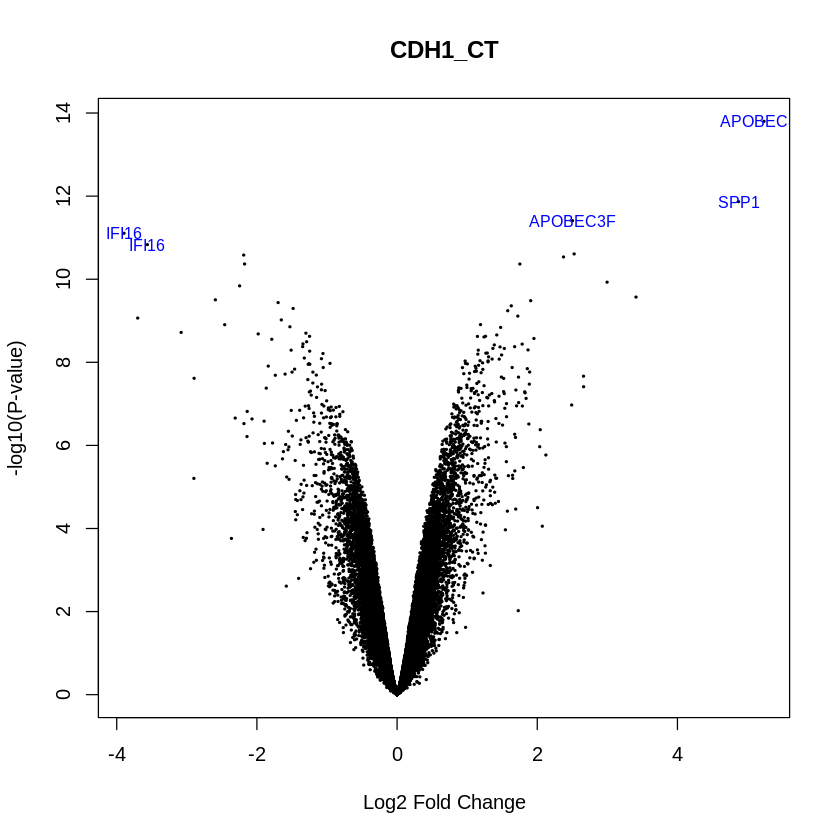

In [ ]:
# this is the same volcano plot as the above, the differences is that
# the top higlights the genes that are up and down regulated
# whereas here it doesnt but it labeles top 5 genes that are DE
volcanoplot(fit2, coef=ct, main=colnames(fit2)[ct], pch=20,
  highlight= 5, names= fit2$genes[,"Gene symbol"])

The top 5 genes that are differentially expressed in CDH1 over expression are shown on the graph. 

3 of those genes are upregulated 
- APOBEC
- SPP1
- APOBEC3F

2 of those genes are downregulated
- IFI16
- IFI16

**CDH1a Volcano plot**

In [ ]:
# list contrast names
colnames(fit2) 

[1] "CDH1_CT"  "CDH1a_CT"

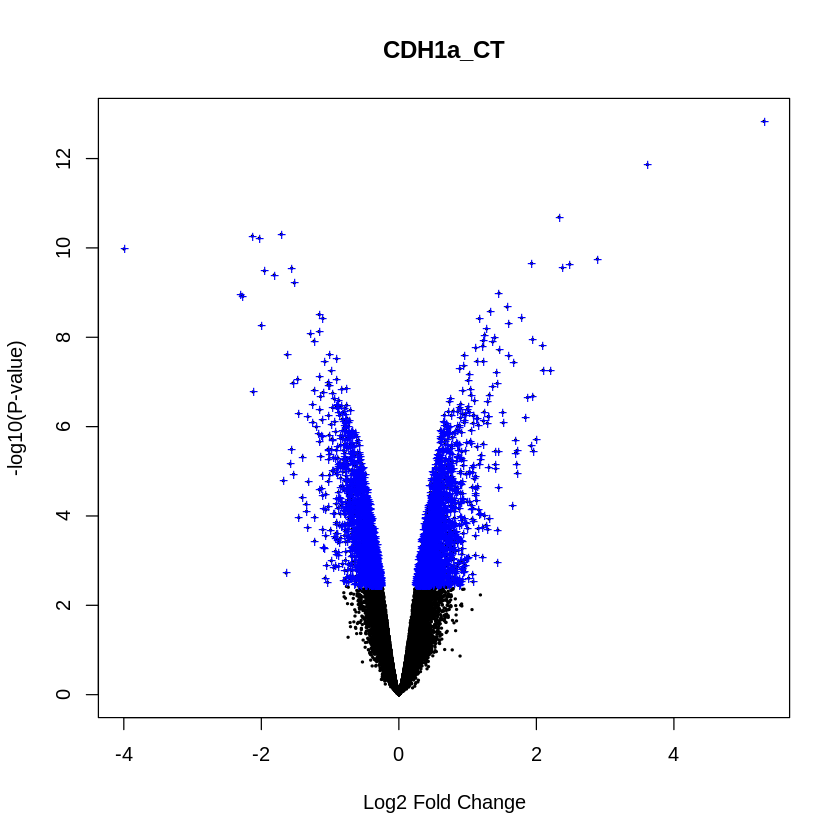

In [ ]:
# Here I am choosing CDH1a as my contrast and it happens to be at position 2
# to understand the rest please refer to the same instruction as listed in the CDH1 section

ct <- 2        
volcanoplot(fit2, coef=ct, main=colnames(fit2)[ct], pch=20,
  highlight=length(which(results[,ct]!=0)), names=rep('+', nrow(fit2)))
# abline(h=2.1)

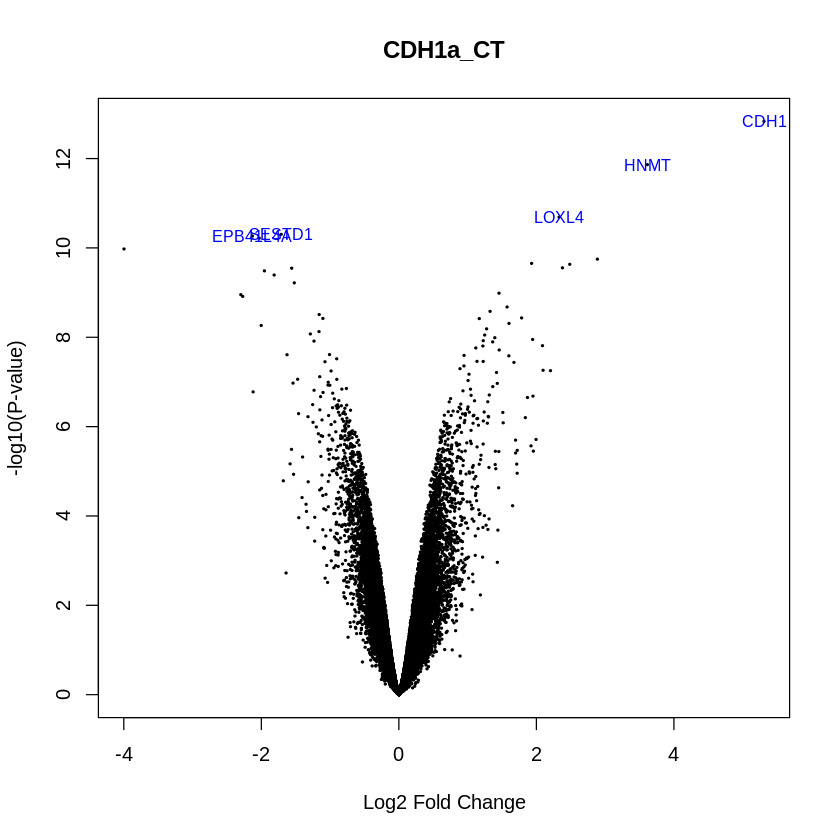

In [ ]:
# this is the same volcano plot as the above, the differences is that
# the top higlights the genes that are up and down regulated
# whereas here it doesnt but it labeles top 5 genes that are DE
volcanoplot(fit2, coef=ct, main=colnames(fit2)[ct], pch=20,
  highlight= 5, names= fit2$genes[,"Gene symbol"])

The top 5 genes that are differentially expressed in CDH1a over expression are shown on the graph. 

3 of those genes are upregulated 
- CDH1
- HNMT
- LOXL4

2 of those genes are downregulated
- SESTD1
- EPB41L4A

Interestingly, CDH1a is found to be over expressing CDH1. earlier on in the heatmap, CDH1a is found to be closely related to gastric cancer but why is is over expressing CDH1 which is a tumour supressor? The results seems very contradicting.

Further investigation is done and it is found that CDH1a can cause tumourigenic effect when it is expressed together with CDH1, otherwise it doesnt (Khouzam et al., 2016). Therefore CDH1a is only tumourigenenic when it is expressed with CDH1. 

# **Enrichment Analysis**

---



If you want to further your analysis you can perform enrichment analysis. Enrichment analysis is performed when you would like to to identify classes of genes or proteins that are over-represented in a large set of genes. Here I will only give examples on how to perform them and will not go into depth.

There are several enrichment database that you can use such as:

1. KEGG
2. GO
3. GSEA

# 1. KEGG

Datacamp method

1. CDH1 

In [ ]:
# to view the column names in fit2 
colnames(fit2$genes)

[1] "ID"                    "Gene title"            "Gene symbol"          
 [4] "Gene ID"               "UniGene title"         "UniGene symbol"       
 [7] "UniGene ID"            "Nucleotide Title"      "GI"                   
[10] "GenBank Accession"     "Platform_CLONEID"      "Platform_ORF"         
[13] "Platform_SPOTID"       "Chromosome location"   "Chromosome annotation"
[16] "GO:Function"           "GO:Process"            "GO:Component"         
[19] "GO:Function ID"        "GO:Process ID"         "GO:Component ID"

In [ ]:
# to extract the gene ID found in fit2 
geneID <- fit2$genes[,"Gene ID"]

In [ ]:
# this is to check which coefficient represents CDH1
# here coefficient 1 represents CDH1
# colnames(fit2)
colnames(fit2)[1]

[1] "CDH1_CT"

In [ ]:
# used KEGG to do enrichment analysis using the extracted gene ID and species used is humans(homosapiens)
# topKEGG allows you to view the top 10 pathways but you can specify other numbers
# here I used coefficient 1 to analyse pathway that is involved in CDH1

CDH1_enrich_kegg <- kegga(fit2, coef = 1, geneid = geneID, species = "Hs")
top10_CDH1_enrich_kegg <- topKEGG(CDH1_enrich_kegg, number = 10)
top10_CDH1_enrich_kegg

,Pathway,N,Up,Down,P.Up,P.Down
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
path:hsa05200,Pathways in cancer,515,99,65,2.114846e-11,1.119339e-01
path:hsa05206,MicroRNAs in cancer,163,42,17,2.466474e-09,6.085955e-01
path:hsa05225,Hepatocellular carcinoma,157,41,16,2.479205e-09,6.452653e-01
path:hsa04520,Adherens junction,68,23,10,4.611505e-08,1.999352e-01
path:hsa03040,Spliceosome,119,11,34,6.109580e-01,8.149014e-08
path:hsa04068,FoxO signaling pathway,128,33,17,1.205592e-07,2.249704e-01
path:hsa04015,Rap1 signaling pathway,202,44,23,2.243108e-07,4.387810e-01
path:hsa04150,mTOR signaling pathway,150,35,20,6.895892e-07,1.966856e-01
path:hsa04934,Cushing syndrome,151,35,14,8.150037e-07,7.729077e-01


In [ ]:
# this represents the number of pathway detected 
dim(CDH1_enrich_kegg)

[1] 347   6

In [ ]:
# preparing data to create bar chart 
# https://rpubs.com/dvdunne/ggplot_two_bars 
CDH1_Kegg <- gather(top10_CDH1_enrich_kegg, gene_regulation, total_genes, Up:Down)
CDH1_Kegg

Pathway,N,P.Up,P.Down,gene_regulation,total_genes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Pathways in cancer,515,2.114846e-11,1.119339e-01,Up,99
MicroRNAs in cancer,163,2.466474e-09,6.085955e-01,Up,42
Hepatocellular carcinoma,157,2.479205e-09,6.452653e-01,Up,41
Adherens junction,68,4.611505e-08,1.999352e-01,Up,23
Spliceosome,119,6.109580e-01,8.149014e-08,Up,11
FoxO signaling pathway,128,1.205592e-07,2.249704e-01,Up,33
Rap1 signaling pathway,202,2.243108e-07,4.387810e-01,Up,44
mTOR signaling pathway,150,6.895892e-07,1.966856e-01,Up,35
Cushing syndrome,151,8.150037e-07,7.729077e-01,Up,35


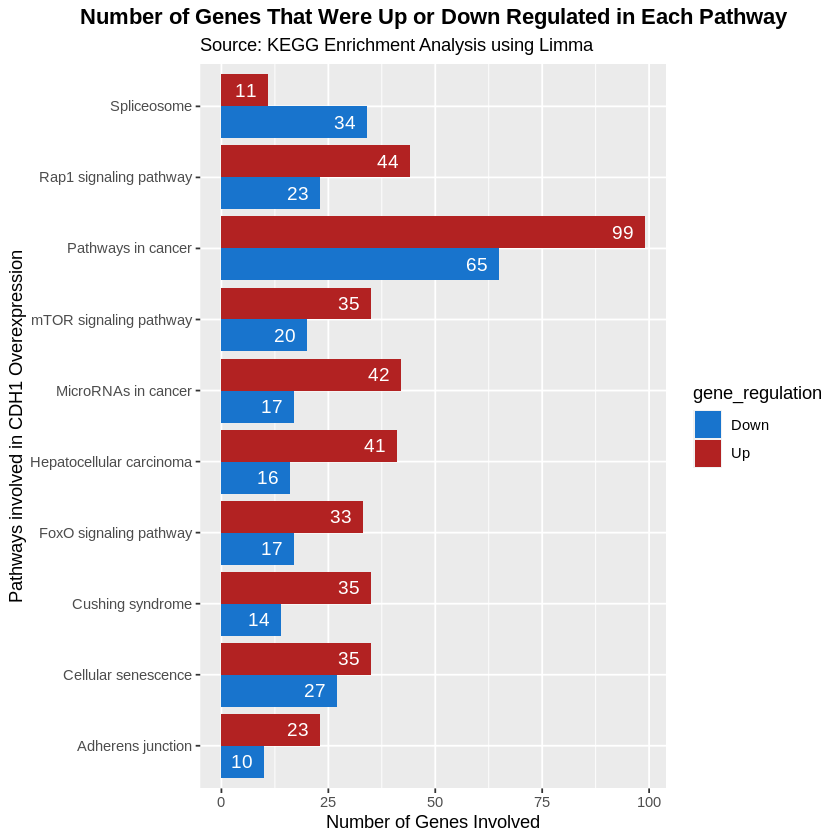

In [ ]:
# Creating a bar chart
# geom_col are used to create bar charts
# fill indicates what color you want your bar chart to be
# http://sape.inf.usi.ch/quick-reference/ggplot2/colour
# theme_classic is to get rid of grid lines
# in labs section you can add your titles to your plot
# you can change the font and the colouring of your titles in the theme section
# hjust in the theme section helps to adjust the position of the title
# geom text helps to add labels to the bar chart
# https://towardsdatascience.com/how-to-make-stunning-bar-charts-in-r-a-complete-guide-with-ggplot2-c8f3b87de4d1
# position = position_dodge(), helps to centre the labels inside every group

ggplot(CDH1_Kegg, aes(x = Pathway, y = total_genes, fill = gene_regulation))+
geom_col(position = position_dodge())+
scale_fill_manual(values = c("dodgerblue3", "firebrick")) +
coord_flip()+
#theme_classic()+
labs(
  title = "Number of Genes That Were Up or Down Regulated in Each Pathway",
  subtitle = "Source: KEGG Enrichment Analysis using Limma",
  x = "Pathways involved in CDH1 Overexpression",
  y = "Number of Genes Involved"
)+
geom_text(aes(label = total_genes),position = position_dodge(0.9), vjust =0.5, hjust = 1.5, size = 4, color = '#ffffff')+
theme(
  plot.title = element_text(face = "bold", hjust = 0.5)
)


Here is an example of what you can do with the information. It helps us to see what pathways CDH1 over expression to be involved in and how many genes were up and down regulated in each pathway. 

2. CDH1a 

In [ ]:
# this is to check which coefficient represents CDH1a
# here coefficient 2 represents CDH1a
# colnames(fit2)
colnames(fit2)[2]

[1] "CDH1a_CT"

In [ ]:
# used KEGG to do enrichment analysis using the extracted gene ID and species used is humans(homosapiens)
# topKEGG allows you to view the top 10 pathways but you can specify other numbers
# here I used coefficient 1 to analyse pathway that is involved in CDH1

CDH1a_enrich_kegg <- kegga(fit2, coef = 2, geneid = geneID, species = "Hs")
top10_CDH1a_enrich_kegg <- topKEGG(CDH1a_enrich_kegg, number = 10)
top10_CDH1a_enrich_kegg

,Pathway,N,Up,Down,P.Up,P.Down
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
path:hsa01100,Metabolic pathways,1435,82,154,7.094823e-01,4.909502e-10
path:hsa04144,Endocytosis,239,26,38,2.594596e-03,3.270946e-07
path:hsa04142,Lysosome,127,4,23,9.517209e-01,7.593533e-06
path:hsa05132,Salmonella infection,242,18,35,2.086407e-01,8.429041e-06
path:hsa04120,Ubiquitin mediated proteolysis,137,16,23,8.346133e-03,2.725585e-05
path:hsa05130,Pathogenic Escherichia coli infection,187,12,28,4.526297e-01,3.449600e-05
path:hsa04621,NOD-like receptor signaling pathway,171,15,26,9.222809e-02,4.968921e-05
path:hsa05131,Shigellosis,234,14,32,5.490723e-01,6.167223e-05
path:hsa04071,Sphingolipid signaling pathway,117,10,20,1.671405e-01,6.855634e-05


In [ ]:
# preparing data to create bar chart 
# https://rpubs.com/dvdunne/ggplot_two_bars 
CDH1a_Kegg <- gather(top10_CDH1a_enrich_kegg, gene_regulation, total_genes, Up:Down)
CDH1a_Kegg

Pathway,N,P.Up,P.Down,gene_regulation,total_genes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Metabolic pathways,1435,7.094823e-01,4.909502e-10,Up,82
Endocytosis,239,2.594596e-03,3.270946e-07,Up,26
Lysosome,127,9.517209e-01,7.593533e-06,Up,4
Salmonella infection,242,2.086407e-01,8.429041e-06,Up,18
Ubiquitin mediated proteolysis,137,8.346133e-03,2.725585e-05,Up,16
Pathogenic Escherichia coli infection,187,4.526297e-01,3.449600e-05,Up,12
NOD-like receptor signaling pathway,171,9.222809e-02,4.968921e-05,Up,15
Shigellosis,234,5.490723e-01,6.167223e-05,Up,14
Sphingolipid signaling pathway,117,1.671405e-01,6.855634e-05,Up,10


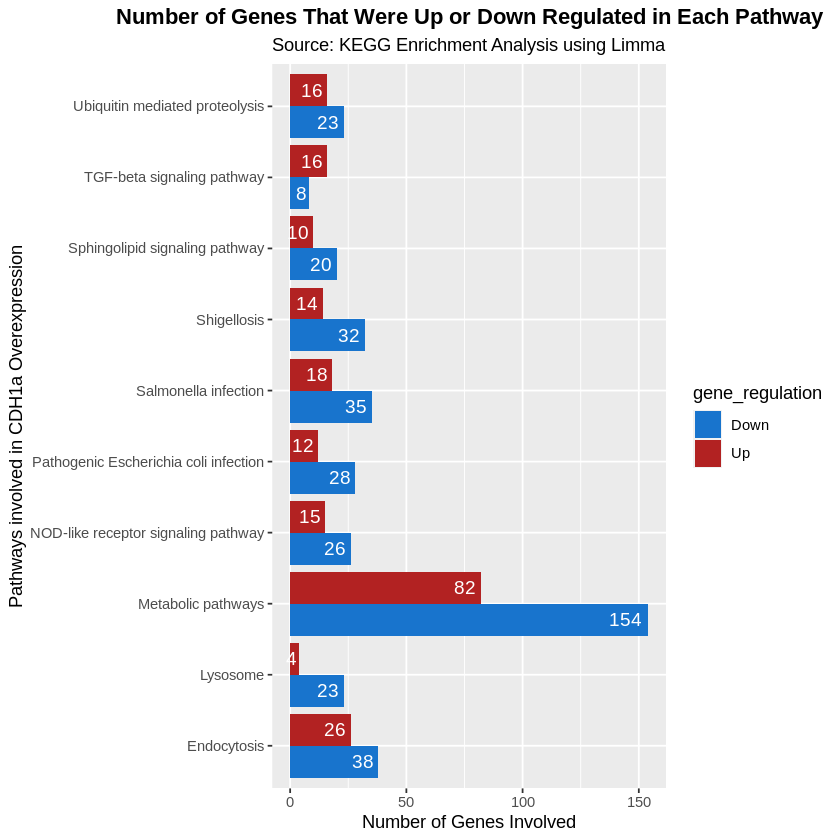

In [ ]:
# Creating a bar chart
# geom_col are used to create bar charts
# fill indicates what color you want your bar chart to be
# http://sape.inf.usi.ch/quick-reference/ggplot2/colour
# theme_classic is to get rid of grid lines
# in labs section you can add your titles to your plot
# you can change the font and the colouring of your titles in the theme section
# hjust in the theme section helps to adjust the position of the title
# geom text helps to add labels to the bar chart
# https://towardsdatascience.com/how-to-make-stunning-bar-charts-in-r-a-complete-guide-with-ggplot2-c8f3b87de4d1
# position = position_dodge(), helps to centre the labels inside every group

ggplot(CDH1a_Kegg, aes(x = Pathway, y = total_genes, fill = gene_regulation))+
geom_col(position = position_dodge())+
scale_fill_manual(values = c("dodgerblue3", "firebrick")) +
coord_flip()+
#theme_classic()+
labs(
  title = "Number of Genes That Were Up or Down Regulated in Each Pathway",
  subtitle = "Source: KEGG Enrichment Analysis using Limma",
  x = "Pathways involved in CDH1a Overexpression",
  y = "Number of Genes Involved"
)+
geom_text(aes(label = total_genes),position = position_dodge(0.9), vjust =0.5, hjust = 1.2, size = 4, color = '#ffffff')+
theme(
  plot.title = element_text(face = "bold", hjust = 0.5)
)

# 2. GO Enrichment

There are a few ontologies that can be used in GO:

- Biological Process (BP)
- Molecular Functions (MF)
- Cellular Components (CC) 

GO: CDH1 

1. Biological Process

In [ ]:
# this is to check which coefficient represents CDH1
# here coefficient 1 represents CDH1
# colnames(fit2)
colnames(fit2)[1]

[1] "CDH1_CT"

In [ ]:
# doing enrichment analysis using GO with the extracted gene ID from before and using the humans (homosapiens) as species
CDH1_enrich_go_bp <- goana(fit2, coef = 1, geneid = geneID, species = "Hs")
top10_CDH1_enrich_goBP <- topGO(CDH1_enrich_go_bp, ontology = "BP", number = 10)
top10_CDH1_enrich_goBP

,Term,Ont,N,Up,Down,P.Up,P.Down
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0008150,biological_process,BP,15584,1820,1998,8.099939e-56,6.490792e-53
GO:0009987,cellular process,BP,14805,1753,1916,4.168658e-53,4.463081e-48
GO:0044237,cellular metabolic process,BP,9468,1205,1352,3.729154e-34,5.805682e-42
GO:0050789,regulation of biological process,BP,10221,1300,1231,1.450623e-39,6.480459e-06
GO:0065007,biological regulation,BP,10863,1362,1309,1.468470e-39,1.397632e-06
GO:0008152,metabolic process,BP,10300,1286,1433,7.038541e-34,2.499676e-39
GO:0050794,regulation of cellular process,BP,9786,1256,1175,3.335825e-39,3.015189e-05
GO:0006807,nitrogen compound metabolic process,BP,8767,1128,1255,1.445531e-32,3.755308e-37
GO:0071704,organic substance metabolic process,BP,9847,1245,1374,9.350926e-35,6.978806e-37


2. Molecular Function

In [ ]:
# doing enrichment analysis using GO with the extracted gene ID from before and using the humans (homosapiens) as species
CDH1_enrich_go_mf <- goana(fit2, coef = 1, geneid = geneID, species = "Hs")
top10_CDH1_enrich_goMF <- topGO(CDH1_enrich_go_mf, ontology = "MF", number = 10)
head(top10_CDH1_enrich_goMF)

,Term,Ont,N,Up,Down,P.Up,P.Down
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0003674,molecular_function,MF,16078,1846,2067,7.530054e-51,1.205886e-65
GO:0005488,binding,MF,14745,1734,1945,1.360786e-47,2.293570e-61
GO:0005515,protein binding,MF,12876,1555,1761,2.273932e-41,7.816481e-58
GO:0003723,RNA binding,MF,1552,192,329,8.749854e-04,1.596139e-33
GO:1901363,heterocyclic compound binding,MF,5477,695,776,1.411983e-14,5.406774e-17
GO:0097159,organic cyclic compound binding,MF,5556,707,785,3.533167e-15,6.440674e-17


3. Cellular Components

In [ ]:
# doing enrichment analysis using GO with the extracted gene ID from before and using the humans (homosapiens) as species
CDH1_enrich_go_cc <- goana(fit2, coef = 1, geneid = geneID, species = "Hs")
top10_CDH1_enrich_goCC <- topGO(CDH1_enrich_go_cc, ontology = "CC", number = 10)
head(top10_CDH1_enrich_goCC)

,Term,Ont,N,Up,Down,P.Up,P.Down
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0005622,intracellular anatomical structure,CC,13562,1709,1902,2.212387e-77,4.072449e-89
GO:0043229,intracellular organelle,CC,12056,1542,1740,9.751985e-62,2.887487e-80
GO:0043231,intracellular membrane-bounded organelle,CC,11100,1431,1643,1.252997e-53,8.166177e-80
GO:0043227,membrane-bounded organelle,CC,12064,1516,1727,2.507043e-52,8.937780e-75
GO:0043226,organelle,CC,12781,1607,1791,3.980896e-62,1.760125e-72
GO:0005575,cellular_component,CC,16365,1894,2081,8.625142e-65,3.122069e-61


GO: CDH1a

1. Biological Process

In [ ]:
# doing enrichment analysis using GO with the extracted gene ID from before and using the humans (homosapiens) as species
CDH1a_enrich_go_bp <- goana(fit2, coef = 2, geneid = geneID, species = "Hs")
top10_CDH1a_enrich_gobp <- topGO(CDH1a_enrich_go_bp, ontology = "BP", number = 10)
head(top10_CDH1a_enrich_gobp)

,Term,Ont,N,Up,Down,P.Up,P.Down
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0008150,biological_process,BP,15584,1109,1226,1.913114e-29,3.542176e-33
GO:0044237,cellular metabolic process,BP,9468,781,796,1.198025e-31,5.707282e-18
GO:0043170,macromolecule metabolic process,BP,8486,720,674,1.466258e-31,1.867672e-08
GO:0071704,organic substance metabolic process,BP,9847,801,806,9.062254e-31,7.806727e-15
GO:0008152,metabolic process,BP,10300,826,841,3.740581e-30,1.002199e-15
GO:0044260,cellular macromolecule metabolic process,BP,7199,631,593,1.179714e-29,9.880850e-10


2. Molecular Function

In [ ]:
# doing enrichment analysis using GO with the extracted gene ID from before and using the humans (homosapiens) as species
CDH1a_enrich_go_mf <- goana(fit2, coef = 2, geneid = geneID, species = "Hs")
top10_CDH1a_enrich_gomf <- topGO(CDH1a_enrich_go_mf, ontology = "MF", number = 10)
top10_CDH1a_enrich_gomf

,Term,Ont,N,Up,Down,P.Up,P.Down
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0003674,molecular_function,MF,16078,1130,1272,1.517545e-28,5.752096e-43
GO:0005488,binding,MF,14745,1066,1165,1.029305e-28,1.462560e-27
GO:0005515,protein binding,MF,12876,958,1057,1.204999e-25,4.171636e-28
GO:0003676,nucleic acid binding,MF,3640,351,228,3.166265e-20,9.220808e-01
GO:0097159,organic cyclic compound binding,MF,5556,485,411,5.667425e-20,1.828871e-02
GO:0003824,catalytic activity,MF,5067,356,490,1.612498e-03,6.048609e-20
GO:1901363,heterocyclic compound binding,MF,5477,478,404,1.411926e-19,2.285919e-02
GO:0003677,DNA binding,MF,2276,223,115,3.703056e-13,9.998726e-01
GO:0016787,hydrolase activity,MF,2121,147,219,6.283606e-02,6.711256e-11


3. Cellular Components 

In [ ]:
# doing enrichment analysis using GO with the extracted gene ID from before and using the humans (homosapiens) as species
CDH1a_enrich_go_cc <- goana(fit2, coef = 2, geneid = geneID, species = "Hs")
top10_CDH1a_enrich_gocc <- topGO(CDH1a_enrich_go_cc, ontology = "CC", number = 10)
top10_CDH1a_enrich_gocc

,Term,Ont,N,Up,Down,P.Up,P.Down
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0005737,cytoplasm,CC,11023,812,1051,1.024477e-15,2.013515e-68
GO:0005622,intracellular anatomical structure,CC,13562,1044,1178,1.797097e-43,9.249963e-60
GO:0005575,cellular_component,CC,16365,1142,1288,4.704788e-28,2.284039e-44
GO:0110165,cellular anatomical entity,CC,16227,1134,1281,2.413141e-27,5.074130e-44
GO:0043226,organelle,CC,12781,983,1096,1.594310e-35,2.942877e-43
GO:0043227,membrane-bounded organelle,CC,12064,925,1052,2.602762e-29,8.779518e-43
GO:0043229,intracellular organelle,CC,12056,950,1048,8.371983e-38,1.649461e-41
GO:0043231,intracellular membrane-bounded organelle,CC,11100,877,978,2.002479e-31,7.389107e-38
GO:0005829,cytosol,CC,5035,436,539,8.667531e-17,2.877946e-34


# 3. GSEA

You can also use GSEA to do your enrichment analysis 

There are two types of analysis in GSEA:

1. Normal GSEA 
2. Preranked GSEA

However, we are not going to go into this. Below are some materials you could refer to.

You also need to download their software into your computer through the following link (Resgistration required):

https://www.gsea-msigdb.org/gsea/downloads.jsp 

Using the Enrichment map to help visualise results:

https://enrichmentmap.readthedocs.io/en/latest/QuickTour.html 

https://cytoscape.org/cytoscape-tutorials/protocols/enrichmentmap-pipeline/#/


# **Creating Gene Network** 

---



With a list  of gene symbols, you can use them to create beautiful gene networks to visualise how they work together! Below are some of the ways you could do it. However, I will not go into it. It was placed here for your reference :)

# 1. STRING Database

STRING DB only accepts gene symbols or sequences as input 

It is also a web browser interface in which you can access through this website: 

https://string-db.org/cgi/input?sessionId=biHo1jCwpGgV&input_page_show_search=on

How to use it?

- under search, go to multiple protein
- There, you will need to past the list of gene symbols or you can upload your files
- then set your organism to humans (Homo Sapiens)
- The web browser can only accept up to 2,000 inputs

Here are some trainings you can di before using the website:

https://jensenlab.org/training/string/


You can also download their app here which allows for more flexibility and control:

http://apps.cytoscape.org/apps/stringapp 

Here are the manuals on how to use their cytoscape app:

https://cytoscape.org/cytoscape-tutorials/protocols/differentially-expressed-genes/#/intro2 

Here are the tutorials on how to use the STRING plug-ins in the cytoscape app:

https://jensenlab.org/training/stringapp/




# 2. Gene Mania

Gene mania only accepts gene symbols or NCBI gene ID's as input

It is a web browser interface in which you can access through this website :
https://genemania.org/ 

you can follow the step by step tutorial here:
http://compbio.ucsd.edu/step-step-guide-generating-gene-interaction-networks-genemania/

However, I will not be touching this. This was put here for your reference 